In [1]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(stringr)
library(Sierra)
library(presto)
library(ggplot2)
library(msigdbr)
library(fgsea)
library(sctransform)
library(tidyverse)
setwd('/data/APAproject/post_qual/data/control_vs_pathology/')

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
"replacing previous import 'GenomicRanges::union' by 'dplyr::union' when loading 'Sierra'"
Warning message:
"replacing previous import 'GenomicRanges::intersect' by 'dplyr::intersect' when loading 'Sierra'"
Warning message:
"replacing previous import 'GenomicRanges::setdiff' by 'dplyr::setdiff' when loading 'Sierra'"
Warning message:
"replacing previous import 'Gviz::tail' by 'utils::tail' when loading 'Sierra'"
Warning message:
"replacing previous import 'Gviz::head' by 'utils::head' when loading 'Sierra'"
Loading required package: Rcpp

Loading required package: data.table


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


Registered S3 method overwritten by 'cli':
  method     f

In [8]:
reference.file <- '/home/aiden/data/refgenome/refdata-gex-GRCh38-2020-A/genes//genes.gtf'
gtf_gr <- rtracklayer::import(reference.file)
gtf_TxDb <- GenomicFeatures::makeTxDbFromGFF(reference.file, format="gtf")

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
OK



In [2]:
## first Exc neurons! lets integerate the normal vs control EXc both GE and peaks Sos

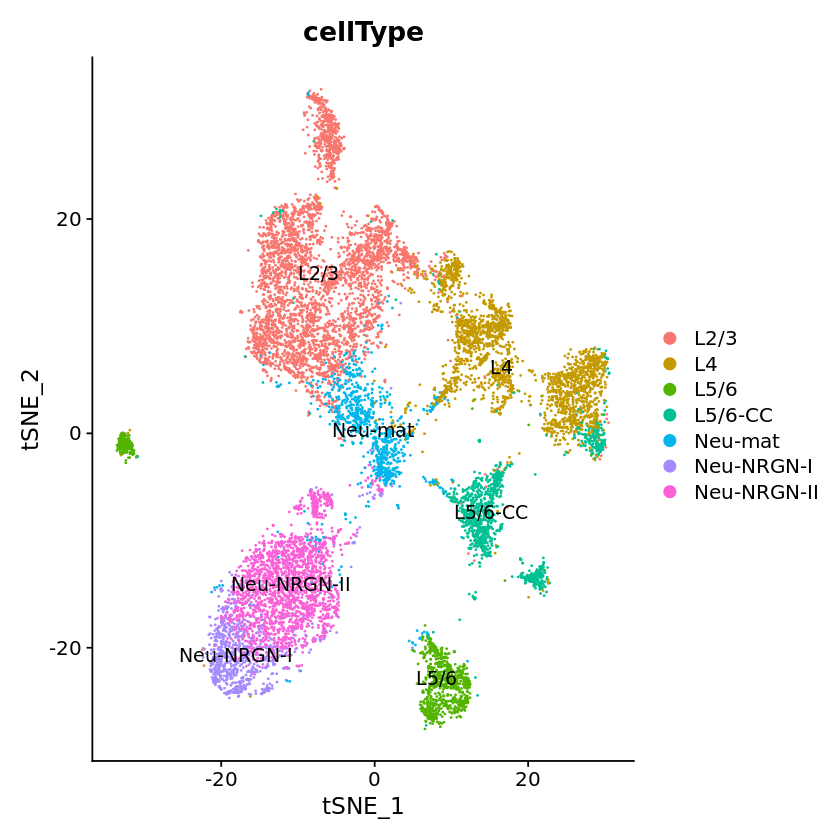

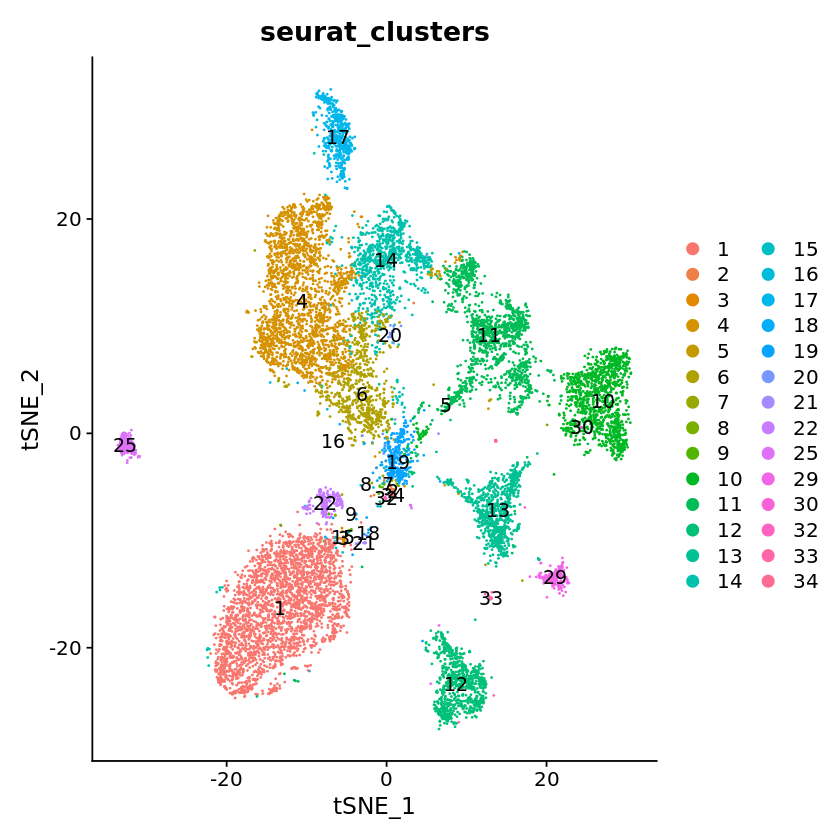

In [36]:
Exc_ge_ct <- readRDS('../../data/Dimitry_Velmeshev_ASD/rdata/ge_celltypes_Sos/PFC_Excitatory_Neurons_ge.rds')
# DimPlot(Exc_ge_ct, reduction='tsne', group.by='cellType', label=T)
# DimPlot(Exc_ge_ct, reduction='tsne', group.by='seurat_clusters', label=T)
length(rownames(Exc_ge_ct))

## ok should I compare the subclusters to subclusters or main celltypes to AD_Exc subclusters? 
## for the first round lets go with the first option

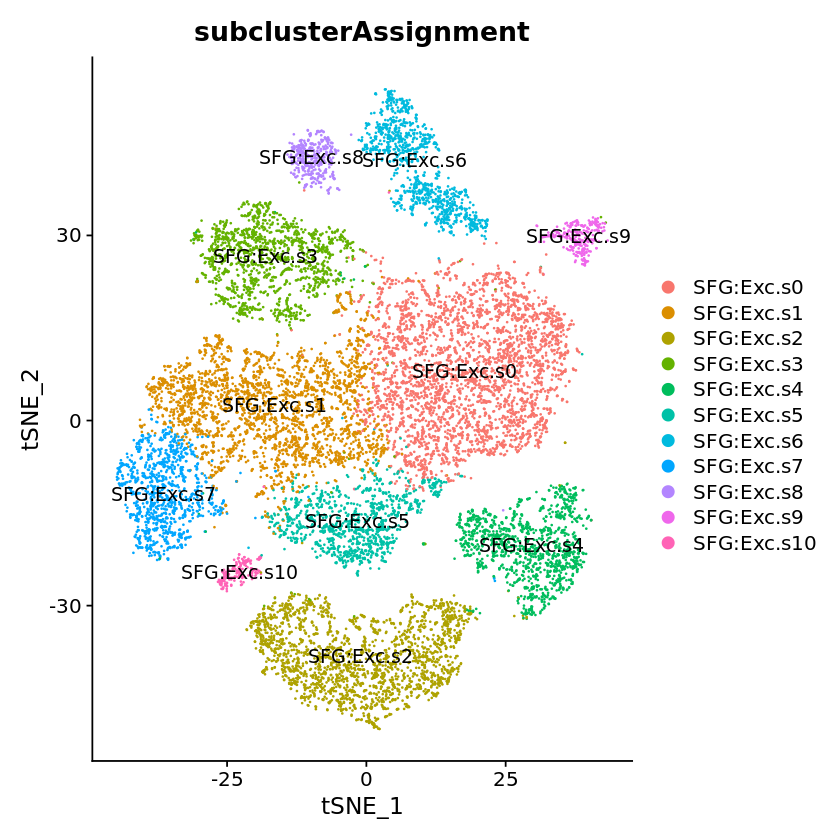

In [37]:
Exc_ge_AD <- readRDS('../Kapmann/rdata/ge_celltypes_Sos/SFG_Exc_ge.rds')
DimPlot(Exc_ge_AD, reduction='TSNE', group.by='subclusterAssignment', label=T)

In [38]:
## just as an experiment lets see what are these clusters ha?
## Orr you know what lets just compare everything here to the control and then look at identities?? 
## ok apparently I do have a set these subclusters labeled in SFG_all_neurons.rds in rdata of Dimitry I guess

In [40]:
Exc_ge_AD <- RenameAssays(object = Exc_ge_AD, originalexp = 'RNA')

Renaming default assay from originalexp to RNA



In [45]:
Exc_ge_ct$cond <- 'CT'
Exc_ge_AD$cond <- 'AD'
Exc_ge_ct$subclusterAssignment <- Exc_ge_ct$cluster
table(Exc_ge_ct$subclusterAssignment)


       L2/3          L4        L5/6     L5/6-CC     Neu-mat  Neu-NRGN-I 
       3701        2245         996        1253         963         799 
Neu-NRGN-II 
       2066 

In [46]:
so.list <- list(AD=Exc_ge_AD, CT=Exc_ge_ct)
so.list <- lapply(X = so.list, FUN = SCTransform)
features <- SelectIntegrationFeatures(object.list = so.list, nfeatures = 2000)
print('feature selection is done')
so.list <- PrepSCTIntegration(object.list = so.list, anchor.features = features)
ge_so.anchors <- FindIntegrationAnchors(object.list = so.list, normalization.method = "SCT",
    anchor.features = features)
print('got the anchors')
Exc_ge_integrated <- IntegrateData(anchorset = ge_so.anchors, normalization.method = "SCT")
print('integration is done')
Exc_ge_integrated <- RunPCA(Exc_ge_integrated, verbose = FALSE)
Exc_ge_integrated <- RunUMAP(Exc_ge_integrated, reduction = "pca", dims = 1:20)
Exc_ge_integrated <- RunTSNE(Exc_ge_integrated, dims = 1:20, perplexity=200)

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 26898 by 15012

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 38 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 26898 genes



  |======================================================================| 100%


Computing corrected count matrix for 26898 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 4.145279 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 32026 by 12023

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"


  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 38 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 32026 genes



  |======================================================================| 100%


Computing corrected count matrix for 32026 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 4.183347 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



[1] "feature selection is done"


Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 22145 anchors

Filtering anchors

	Retained 15084 anchors



[1] "got the anchors"


Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



[1] "integration is done"


22:00:36 UMAP embedding parameters a = 0.9922 b = 1.112

22:00:37 Read 27035 rows and found 20 numeric columns

22:00:37 Using Annoy for neighbor search, n_neighbors = 30

22:00:37 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

22:00:40 Writing NN index file to temp file /tmp/Rtmptxm7jI/filee19a27b620e7

22:00:40 Searching Annoy index using 1 thread, search_k = 3000

22:00:49 Annoy recall = 100%

22:00:51 Commencing smooth kNN distance calibration using 1 thread

22:00:54 Initializing from normalized Laplacian + noise

22:00:55 Commencing optimization for 200 epochs, with 1158622 positive edges

22:01:11 Optimization finished



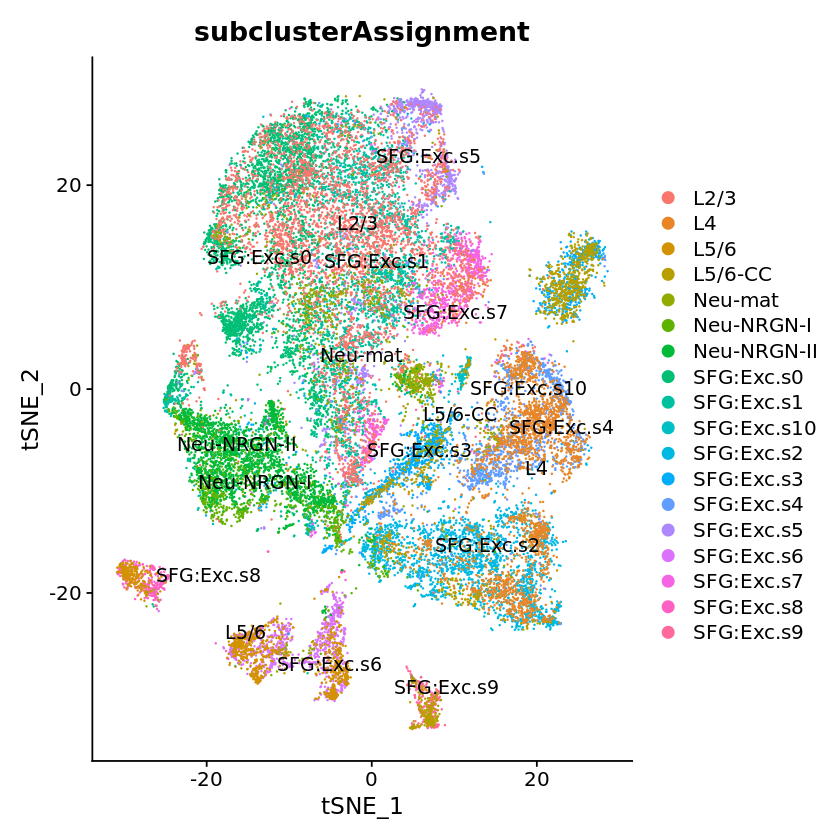

In [48]:
DimPlot(Exc_ge_integrated, reduction='tsne', group.by='subclusterAssignment', label=T, repel=T)

In [51]:
## ok now lets integerate (actually just merge) the peaks objects
Exc_peaks_ct <- readRDS('../../data/Dimitry_Velmeshev_ASD/rdata/peaks_celltype_Sos/PFC_Excitatory_Neurons_peaks.rds')
Exc_peaks_AD <- readRDS('../Kapmann/rdata/peaks_celltype_Sos/SFG_Exc_peaks.rds')

In [52]:
Exc_peaks_merge <- merge(Exc_peaks_ct, Exc_peaks_AD)
Exc_peaks_merge

An object of class Seurat 
479675 features across 27035 samples within 1 assay 
Active assay: RNA (479675 features, 0 variable features)

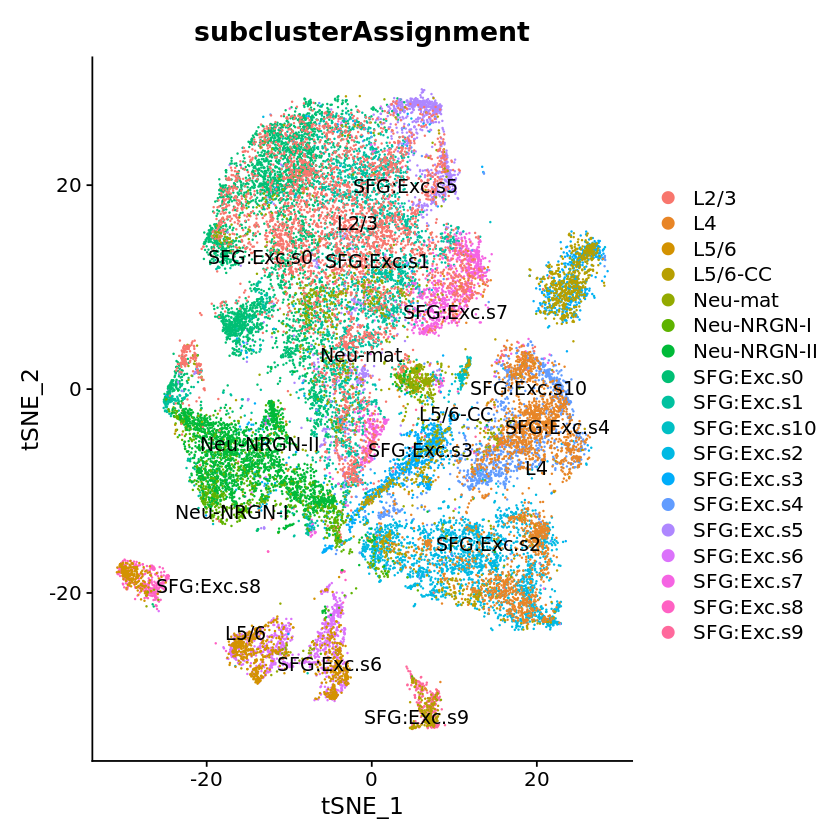

In [53]:
library(stringr)
Exc_ge_integrated <- RenameCells(Exc_ge_integrated, new.names = str_sort(as.character(Cells(Exc_ge_integrated))))
Exc_peaks_merge <- RenameCells(Exc_peaks_merge, new.names = str_sort(as.character(Cells(Exc_peaks_merge))))
Exc_peaks_merge <- AddMetaData(Exc_peaks_merge , metadata=Exc_ge_integrated@meta.data)
Exc_peaks_merge@reductions <- Exc_ge_integrated@reductions
DimPlot(Exc_peaks_merge, reduction='tsne', group.by='subclusterAssignment', label=T, repel=T)

In [54]:
## now save the merged objects: 
saveRDS(Exc_ge_integrated, file='rdata/Exc_ge_CTandAD_merged.rds')
saveRDS(Exc_peaks_merge, file='rdata/Exc_peaks_CTandAD_merged.rds')

In [3]:
Exc_peaks_AD_CT <- readRDS('rdata/Exc_peaks_CTandAD_merged.rds')
print('read the object')
results_root <- 'results/Exc_AD_vs_DimCT/'
reference.file <- '/home/aiden/data/refgenome/refdata-gex-GRCh38-2020-A/genes//genes.gtf'
gtf_gr <- rtracklayer::import(reference.file)
gtf_TxDb <- GenomicFeatures::makeTxDbFromGFF(reference.file, format="gtf")

print('ref build is done')
## edit the plot UTRshift script
# tst <- trace(PlotUTRLengthShift, edit=TRUE)

Exc_peaks_AD_CT <- SetIdent(Exc_peaks_AD_CT, value = 'subclusterAssignment')


[1] "read the object"


Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
OK



[1] "ref build is done"


In [4]:
DetectUTRLengthShift(peaks.object = Exc_peaks_AD_CT, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'L5/6', 
                                      population.2 = 'SFG:Exc.s0')

ERROR: Error in apply(annot.subset, 1, function(x) {: dim(X) must have a positive length


In [ ]:
## ok it seems we have a problem here. merging the AD and CT probably is the issue!
##lets cp all the counts to one directory and then aggeraget and annotate ha?

In [8]:
remove(Exc_peaks_AD_CT)

In [2]:
### lets load the big new peaks object and subset the Exc cells and then add metadata and embeddings
#Read in peak annotations
peak.annotations <- read.table("sierra_AD_CT_mix/AD_CT_peaks_annotated.txt", 
                               header = TRUE,
                               sep = "\t",
                               row.names = 1,
                               stringsAsFactors = FALSE)
peak.counts <- ReadPeakCounts(data.dir = "sierra_AD_CT_mix/KapmannAD_DimCT_Sierra_aggregate/")
AD_CT_all_peaks_so <- NewPeakSeurat(peak.data = peak.counts, 
                              annot.info = peak.annotations, 
                              min.cells = 50, min.peaks = 200)
AD_CT_all_peaks_so

[1] "Creating Seurat object with 356860 peaks and 113255 cells"


Warning message:
"The following arguments are not used: row.names"


[1] "Preparing feature table for DEXSeq"
[1] "No t-SNE coodinates included"
[1] "No UMAP coordinates included"


An object of class Seurat 
354947 features across 113249 samples within 1 assay 
Active assay: RNA (354947 features, 0 variable features)

In [4]:
Exc_peaks_AD_CT <- readRDS('rdata/Exc_peaks_CTandAD_merged.rds')

In [5]:
AD_CT_all_peaks_so$cellnames <- Cells(AD_CT_all_peaks_so)

In [8]:
Exc_peaks_AD_CT_n <- subset(AD_CT_all_peaks_so, subset=cellnames %in% Cells(Exc_peaks_AD_CT))

In [11]:
Exc_peaks_AD_CT_n <- RenameCells(Exc_peaks_AD_CT_n, new.names = str_sort(as.character(Cells(Exc_peaks_AD_CT_n))))

[1] "AAACCTGGTTCGTTGA-1_5387_BA9"

[1] "SFG10_AAAGATGCAGCGTAAG"

In [21]:
Exc_peaks_AD_CT_n <- AddMetaData(Exc_peaks_AD_CT_n, metadata = Exc_peaks_AD_CT@meta.data)
Exc_peaks_AD_CT_n@reductions <- Exc_peaks_AD_CT@reductions

In [22]:
Exc_peaks_AD_CT_n <- SetIdent(Exc_peaks_AD_CT_n, value = Exc_peaks_AD_CT_n$subclusterAssignment)

In [24]:
reference.file <- '/home/aiden/data/refgenome/refdata-gex-GRCh38-2020-A/genes//genes.gtf'
gtf_gr <- rtracklayer::import(reference.file)
gtf_TxDb <- GenomicFeatures::makeTxDbFromGFF(reference.file, format="gtf")

test.res <- DetectUTRLengthShift(peaks.object = Exc_peaks_AD_CT_n, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'L5/6', 
                                      population.2 = 'SFG:Exc.s0')

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
OK



[1] "11907 expressed peaks in feature types UTR3"
[1] "10937 peaks after filtering out A-rich annotations"
[1] "2457 genes detected with multiple peak sites expressed"
[1] "7658 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"


[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 5.05456757943617e-133"


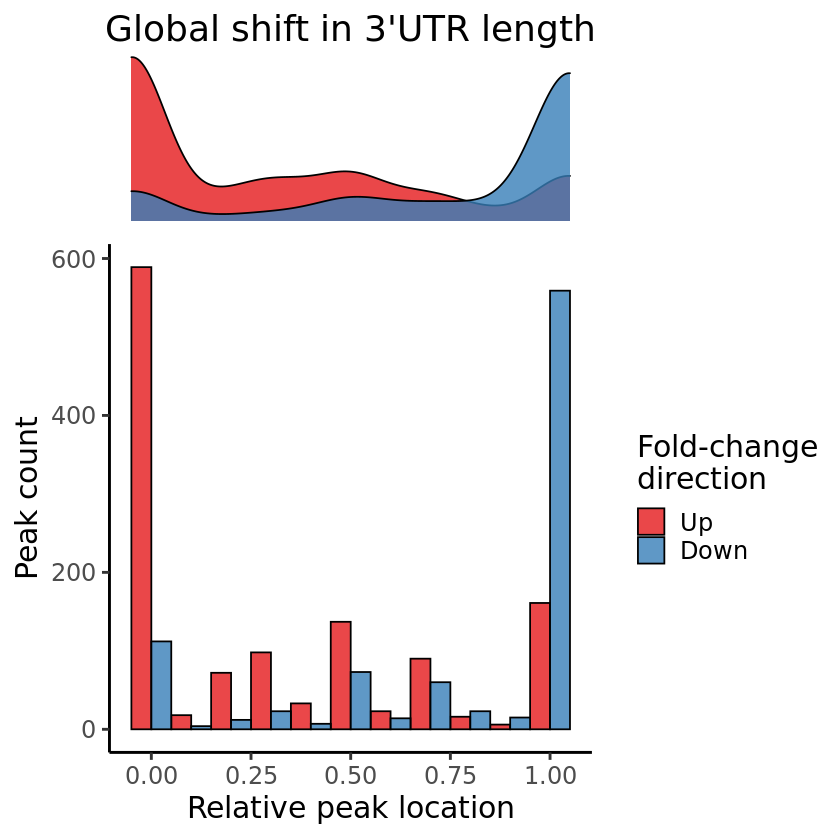

In [28]:
PlotUTRLengthShift(test.res)

In [29]:
test.res

genomic_feature(s) population1_pct
TUBB3:chr16:89935527-89935737:1     UTR3               0.4146586      
TUBB3:chr16:89935627-89936203:1     UTR3               0.6576305      
CALM1:chr14:90396952-90405002:1     UTR3               0.8012048      
CALM1:chr14:90400077-90404905:1     UTR3               0.7670683      
CALM1:chr14:90401271-90404878:1     UTR3               0.7479920      
CALM1:chr14:90403753-90404832:1     UTR3               0.6746988      
PTMA:chr2:231708615-231712887:1     UTR3               0.5542169      
MAP2:chr2:209731344-209731793:1     UTR3               0.3122490      
MAP2:chr2:209730919-209731348:1     UTR3               0.2570281      
ATP1B1:chr1:169131069-169132065:1   UTR3               0.6315261      
ATP1B1:chr1:169127180-169131874:1   UTR3               0.6817269      
ATP1B1:chr1:169129902-169131878:1   UTR3               0.6636546      
ATP1B1:chr1:169131784-169131994:1   UTR3               0.1044177      
ATP1B1:chr1:169131751-169132063:1   UTR3               0.1204819      
PRNP:chr20:4700519-4701029:1        UTR3               0.2761044      
PRNP:chr20:4700420-4701241:1        UTR3               0.4447791      
UBA52:chr19:18573311-18575335:1     UTR3               0.5291165      
CALM3:chr19:46608441-46609335:1     UTR3               0.4588353      
CALM3:chr19:46608763-46609337:1     UTR3               0.4136546      
PPIA:chr7:44799743-44799941:1       UTR3               0.3463855      
PIK3R1:chr5:68293038-68293998:1     UTR3               0.2218876      
PIK3R1:chr5:68291989-68293407:1     UTR3               0.2168675      
PIK3R1:chr5:68293311-68293563:1     UTR3               0.1787149      
PIK3R1:chr5:68293040-68294720:1     UTR3               0.2660643      
STMN2:chr8:79641283-79665317:1      UTR3               0.6967871      
STMN2:chr8:79654550-79665647:1      UTR3               0.6807229      
STMN2:chr8:79665020-79665212:1      UTR3               0.1827309      
WSB1:chr17:27308291-27308770:1      UTR3               0.3664659      
SNAP25:chr20:10306246-10307032:1    UTR3               0.7429719      
CNTN1:chr12:41070401-41071499:1     UTR3               0.2248996      
⋮                                   ⋮                  ⋮              
FEZ2:chr2:36578645-36583468:-1      UTR3               0.09839357     
CORO6:chr17:29614816-29614870:-1    UTR3               0.11044177     
CORO6:chr17:29614801-29614885:-1    UTR3               0.12048193     
REV3L:chr6:111388929-111405839:-1   UTR3               0.11445783     
REV3L:chr6:111389013-111411515:-1   UTR3               0.13955823     
ZNF721:chr4:439917-440451:-1        UTR3               0.10341365     
GRSF1:chr4:70819389-70820115:-1     UTR3               0.15963855     
APOL2:chr22:36226209-36226539:-1    UTR3               0.03012048     
PTP4A2:chr1:31906421-31906759:-1    UTR3               0.13554217     
SF3B1:chr2:197389712-197390228:-1   UTR3               0.10742972     
B4GALNT1:chr12:57626015-57626638:-1 UTR3               0.13052209     
EPM2AIP1:chr3:36987809-36988281:-1  UTR3               0.11546185     
LRP8:chr1:53242364-53242747:-1      UTR3               0.20281124     
ZHX1:chr8:123248451-123249440:-1    UTR3               0.07429719     
PGBD5:chr1:230314490-230315101:-1   UTR3               0.07630522     
MRPS16:chr10:73248843-73249549:-1   UTR3               0.10742972     
CERT1:chr5:75371034-75371556:-1     UTR3               0.13654618     
ANKRD36B:chr2:97552946-97555487:-1  UTR3               0.16265060     
ANKRD36B:chr2:97551142-97555425:-1  UTR3               0.21787149     
IFT57:chr3:108162221-108162695:-1   UTR3               0.15160643     
IFT57:chr3:108162214-108163737:-1   UTR3               0.15662651     
CCNL2:chr1:1386460-1386652:-1       UTR3               0.11244980     
USP33:chr1:77697790-77701546:-1     UTR3               0.19578313     
CA11:chr19:48638145-48638425:-1     UTR3               0.09236948     
JPT1:chr17:75135248-75135600:-1     UTR3               0.219

In [26]:
saveRDS(Exc_peaks_AD_CT_n,file = 'rdata/Exc_peaks_CTandAD_so_final.rds' )

In [30]:
saveRDS(AD_CT_all_peaks_so,file = 'rdata/AD_CT_all_peaks_so.rds' )

ERROR: Error in eval(expr, envir, enclos): object 'AD_CT_all_peaks_so' not found


In [4]:
Exc_peaks_AD_CT_n <- readRDS('rdata/Exc_peaks_CTandAD_so_final.rds')
Exc_peaks_AD_CT_n

An object of class Seurat 
354947 features across 27035 samples within 1 assay 
Active assay: RNA (354947 features, 0 variable features)
 3 dimensional reductions calculated: pca, umap, tsne

In [9]:
table(Exc_peaks_AD_CT_n$cond)


   AD    CT 
15012 12023 

In [10]:
Exc_peaks_AD_CT_n <- SetIdent(Exc_peaks_AD_CT_n, value = Exc_peaks_AD_CT_n$cond)

In [11]:
reference.file <- '/home/aiden/data/refgenome/refdata-gex-GRCh38-2020-A/genes//genes.gtf'
gtf_gr <- rtracklayer::import(reference.file)
gtf_TxDb <- GenomicFeatures::makeTxDbFromGFF(reference.file, format="gtf")

test.res <- DetectUTRLengthShift(peaks.object = Exc_peaks_AD_CT_n, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'AD', 
                                      population.2 = 'CT')

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
OK



[1] "9701 expressed peaks in feature types UTR3"
[1] "8976 peaks after filtering out A-rich annotations"
[1] "2028 genes detected with multiple peak sites expressed"
[1] "6104 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"


In [12]:
test.res

genomic_feature(s) population1_pct
SYT1:chr12:79451569-79452008:1     UTR3               0.74560352     
STMN2:chr8:79665711-79666175:1     UTR3               0.39861444     
STMN2:chr8:79665467-79665761:1     UTR3               0.08113509     
SEPTIN7:chr7:35904888-35905371:1   UTR3               0.36850520     
YWHAH:chr22:31957136-31957603:1    UTR3               0.60045297     
FAM171B:chr2:186765479-186765959:1 UTR3               0.28430589     
PRNP:chr20:4701170-4701590:1       UTR3               0.72222222     
TUBB3:chr16:89935919-89936087:1    UTR3               0.37416733     
TUBB3:chr16:89935880-89936110:1    UTR3               0.38169464     
CALM1:chr14:90407831-90408268:1    UTR3               0.73494538     
CALM1:chr14:90407982-90408198:1    UTR3               0.69670930     
CALM1:chr14:90405127-90405679:1    UTR3               0.33533173     
CALM1:chr14:90407665-90407839:1    UTR3               0.12769784     
CALM1:chr14:90404697-90405075:1    UTR3               0.30475620     
SCOC:chr4:140382110-140382600:1    UTR3               0.24933387     
ATP1B1:chr1:169132205-169132722:1  UTR3               0.73647748     
ATP1B1:chr1:169132156-169132324:1  UTR3               0.25766054     
ATP1B1:chr1:169131694-169132162:1  UTR3               0.10551559     
CADM3:chr1:159201539-159202102:1   UTR3               0.26871836     
R3HDM1:chr2:135724847-135725270:1  UTR3               0.35358380     
PIK3R1:chr5:68301506-68301821:1    UTR3               0.21316280     
PIK3R1:chr5:68298077-68298887:1    UTR3               0.36097788     
PIK3R1:chr5:68297774-68298326:1    UTR3               0.12436717     
SRSF5:chr14:69771517-69772005:1    UTR3               0.36057820     
SRSF5:chr14:69771090-69771846:1    UTR3               0.33313349     
SRSF5:chr14:69771273-69771681:1    UTR3               0.23614442     
CAMTA1:chr1:7769275-7769706:1      UTR3               0.28024247     
SUB1:chr5:32603641-32604079:1      UTR3               0.16340261     
PTMA:chr2:231713071-231713541:1    UTR3               0.42226219     
PTMA:chr2:231712884-231713196:1    UTR3               0.20776712     
⋮                                  ⋮                  ⋮              
TMEM150C:chr4:82483731-82484326:-1 UTR3               0.05435651     
MYT1L:chr2:1923166-1943329:-1      UTR3               0.05422329     
CYCS:chr7:25123211-25124526:-1     UTR3               0.05135891     
CYCS:chr7:25123233-25123431:-1     UTR3               0.03050893     
CYCS:chr7:25123206-25123553:-1     UTR3               0.03823608     
KIF3C:chr2:25927720-25928236:-1    UTR3               0.05648814     
KCNQ2:chr20:63405889-63406544:-1   UTR3               0.08000266     
UBE2D3:chr4:102796202-102796376:-1 UTR3               0.05921929     
UBE2D3:chr4:102796392-102797160:-1 UTR3               0.05122569     
UBE2D3:chr4:102794383-102794757:-1 UTR3               0.06274980     
UBE3A:chr15:25340012-25340294:-1   UTR3               0.07081002     
SCAI:chr9:124942608-124943004:-1   UTR3               0.10198508     
TEX2:chr17:64147595-64148153:-1    UTR3               0.06521450     
AGAP2:chr12:57723761-57724319:-1   UTR3               0.08013589     
ANXA7:chr10:73375595-73376249:-1   UTR3               0.11117772     
ANXA7:chr10:73375703-73376213:-1   UTR3               0.07553957     
AKT3:chr1:243501672-243502208:-1   UTR3               0.06674660     
TMEM59:chr1:54032069-54032393:-1   UTR3               0.04070077     
ANKS1B:chr12:98745358-98745893:-1  UTR3               0.14048761     
SMIM7:chr19:16646033-16646682:-1   UTR3               0.04196643     
RETREG1:chr5:16473038-16473432:-1  UTR3               0.09798828     
GOT1:chr10:99397226-99397747:-1    UTR3               0.03244071     
DLG1:chr3:197138266-197149858:-1   UTR3               0.09299227     
XPO1:chr2:61526311-61534030:-1     UTR3               0.05815348     
DBN1:chr5:177456955-177457935:-1   UTR3               0.10524913     
IMMT:chr2:86171085-86181312:-1     UTR3      

[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 4.0212025622174e-112"


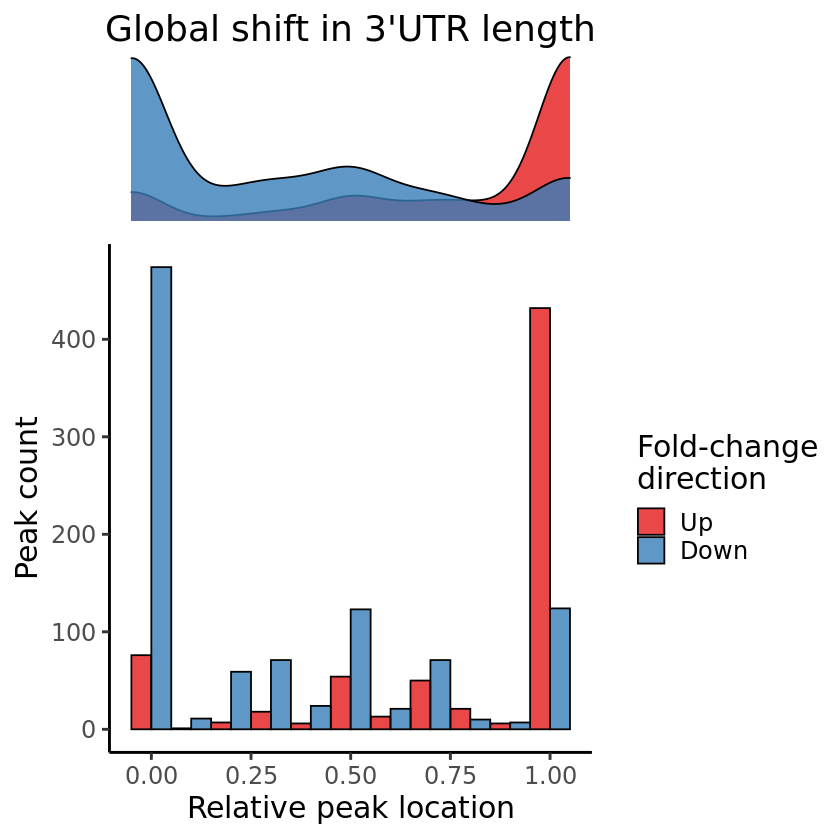

In [13]:
PlotUTRLengthShift(test.res)

In [24]:
root_dir <- '/data/APAproject/post_qual/data/MAPPER_workflow/Excitatory_Neurons/'
ct_bamfiles = read.table('../MAPPER_workflow/Excitatory_Neurons/Exc_metaCells_CT.txt')
AD_bamfiles = read.table('../MAPPER_workflow/Excitatory_Neurons/SFG_Exc_cells/bamlist.txt')
bamfiles = list(paste0(root_dir,ct_bamfiles$V1), paste0(root_dir,'SFG_Exc_cells/',AD_bamfiles$V1))
bamfiles

[[1]]
 [1] "/data/APAproject/post_qual/data/MAPPER_workflow/Excitatory_Neurons/4341_BA46_AstFB_filtered.bam"    
 [2] "/data/APAproject/post_qual/data/MAPPER_workflow/Excitatory_Neurons/5387_BA9_AstFB_filtered.bam"     
 [3] "/data/APAproject/post_qual/data/MAPPER_workflow/Excitatory_Neurons/5408_PFC_Nova_AstFB_filtered.bam"
 [4] "/data/APAproject/post_qual/data/MAPPER_workflow/Excitatory_Neurons/5538_PFC_Nova_AstFB_filtered.bam"
 [5] "/data/APAproject/post_qual/data/MAPPER_workflow/Excitatory_Neurons/5577_BA9_AstFB_filtered.bam"     
 [6] "/data/APAproject/post_qual/data/MAPPER_workflow/Excitatory_Neurons/5879_PFC_Nova_AstFB_filtered.bam"
 [7] "/data/APAproject/post_qual/data/MAPPER_workflow/Excitatory_Neurons/5893_PFC_AstFB_filtered.bam"     
 [8] "/data/APAproject/post_qual/data/MAPPER_workflow/Excitatory_Neurons/5936_PFC_Nova_AstFB_filtered.bam"
 [9] "/data/APAproject/post_qual/data/MAPPER_workflow/Excitatory_Neurons/5958_BA9_AstFB_filtered.bam"     
[10] "/data/APAproject/post_qual/data/MAPPER_workflow/Excitatory_Neurons/5976_BA9_AstFB_filtered.bam"     

[[2]]
[1] "/data/APAproject/post_qual/data/MAPPER_workflow/Excitatory_Neurons/SFG_Exc_cells/SFG10_filtered.bam"
[2] "/data/APAproject/post_qual/data/MAPPER_workflow/Excitatory_Neurons/SFG_Exc_cells/SFG1_filtered.bam" 
[3] "/data/APAproject/post_qual/data/MAPPER_workflow/Excitatory_Neurons/SFG_Exc_cells/SFG2_filtered.bam" 
[4] "/data/APAproject/post_qual/data/MAPPER_workflow/Excitatory_Neurons/SFG_Exc_cells/SFG3_filtered.bam" 
[5] "/data/APAproject/post_qual/data/MAPPER_workflow/Excitatory_Neurons/SFG_Exc_cells/SFG4_filtered.bam" 
[6] "/data/APAproject/post_qual/data/MAPPER_workflow/Excitatory_Neurons/SFG_Exc_cells/SFG5_filtered.bam" 
[7] "/data/APAproject/post_qual/data/MAPPER_workflow/Excitatory_Neurons/SFG_Exc_cells/SFG6_filtered.bam" 
[8] "/data/APAproject/post_qual/data/MAPPER_workflow/Excitatory_Neurons/SFG_Exc_cells/SFG8_filtered.bam" 
[9] "/data/APAproject/post_qual/data/MAPPER_workflow/Excitatory_Neurons/SFG_Exc_cells/SFG9_filtered.bam"

In [28]:
bamlist <-unlist(bamfiles)

In [31]:
bamfiles <- paste0(root_dir, c('Exc_metaCells_CT.bam', 'SFG_Exc_cells/Exc_metaCells_SFG_AD.bam'))
bamfiles

[1] "/data/APAproject/post_qual/data/MAPPER_workflow/Excitatory_Neurons/Exc_metaCells_CT.bam"                  
[2] "/data/APAproject/post_qual/data/MAPPER_workflow/Excitatory_Neurons/SFG_Exc_cells/Exc_metaCells_SFG_AD.bam"

Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


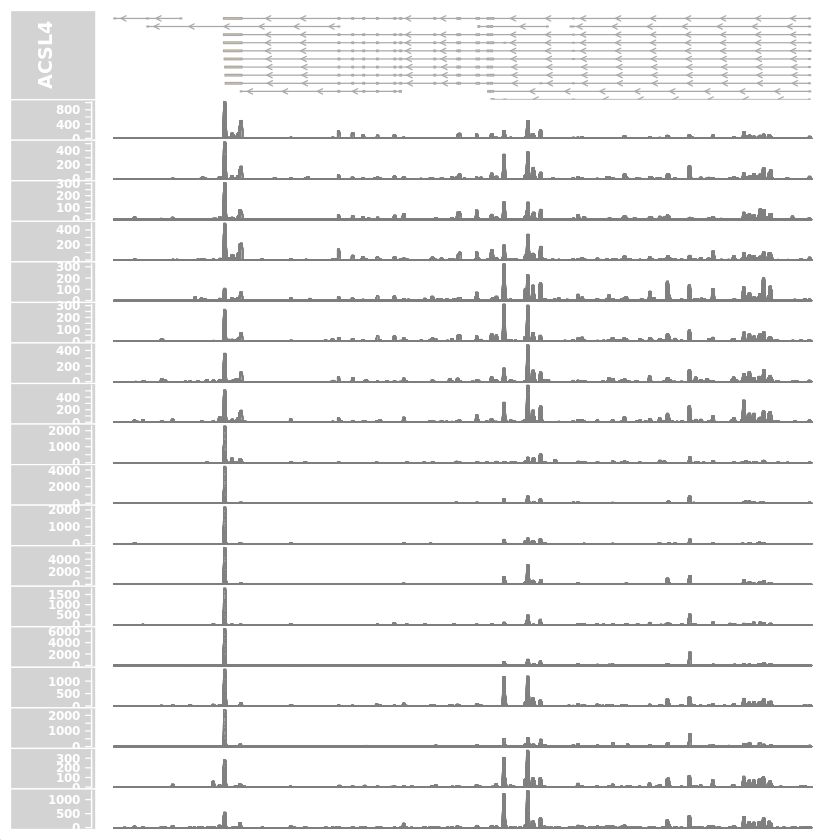

In [69]:
PlotCoverage(genome_gr = gtf_gr, 
             geneSymbol = "ACSL4", 
             genome = "hg38",
             bamfiles = bamlist)

In [47]:
## perfect now lets make better plots :) 
res.table = DUTest(Exc_peaks_AD_CT_n,population.1 = 'AD', population.2 = 'CT',
                   exp.thresh = 0.1, 
                   feature.type = c("UTR3", "exon"))

[1] "13344 expressed peaks in feature types UTR3, exon"
[1] "2840 genes detected with multiple peak sites expressed"
[1] "10462 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."


In [48]:
res.table

gene_name  genomic_feature(s)
IDS:chrX:149482241-149482553:-1     IDS        UTR3              
MATR3:chr5:139329964-139330511:1    MATR3      UTR3              
AKAP11:chr13:42322829-42323261:1    AKAP11     UTR3              
SYT1:chr12:79217424-79217787:1      SYT1       UTR5;intron;exon  
HSP90AB1:chr6:44249479-44250594:1   HSP90AB1   intron;exon       
PEBP1:chr12:118145145-118145584:1   PEBP1      UTR3              
STMN2:chr8:79665711-79666175:1      STMN2      UTR3              
EPHB6:chr7:142870513-142871094:1    EPHB6      UTR3              
PEX5L:chr3:179794958-179795136:-1   PEX5L      UTR3              
CHD5:chr1:6159377-6180168:-1        CHD5       UTR5;intron;exon  
CLU:chr8:27597930-27598637:-1       CLU        UTR3              
CLU:chr8:27610496-27614700:-1       CLU        UTR5;intron;exon  
SEPTIN7:chr7:35904888-35905371:1    SEPTIN7    UTR3              
YWHAH:chr22:31957136-31957603:1     YWHAH      UTR3              
YWHAH:chr22:31944522-31944871:1     YWHAH      UTR5;intron;exon  
RTN3:chr11:63759425-63759891:1      RTN3       UTR3              
FAIM2:chr12:49870318-49889257:-1    FAIM2      UTR3              
AHI1:chr6:135463169-135466416:-1    AHI1       intron;exon       
FAM171B:chr2:186765479-186765959:1  FAM171B    UTR3              
SPARCL1:chr4:87494085-87495121:-1   SPARCL1    UTR5;intron;exon  
SPARCL1:chr4:87528163-87528659:-1   SPARCL1    UTR5;intron;exon  
ATP2B2:chr3:10325968-10326540:-1    ATP2B2     UTR3              
THY1:chr11:119418105-119418634:-1   THY1       UTR3              
THY1:chr11:119418816-119419236:-1   THY1       UTR3              
PRNP:chr20:4701170-4701590:1        PRNP       UTR3              
ARPP21:chr3:35639757-35640315:1     ARPP21     UTR5;intron;exon  
SRRM3:chr7:76286820-76287288:1      SRRM3      UTR3              
PCDH9:chr13:67228421-67230137:-1    PCDH9      UTR5;intron;exon  
MORF4L1:chr15:78897305-78897787:1   MORF4L1    UTR3              
PTMA:chr2:231708615-231712887:1     PTMA       UTR3              
⋮                                   ⋮          ⋮                 
YTHDC2:chr5:113594763-113595285:1   YTHDC2     UTR3              
SEPTIN11:chr4:77019122-77020693:1   SEPTIN11   intron;exon       
HACD3:chr15:65577884-65578349:1     HACD3      UTR3              
ELOC:chr8:73945381-73946377:-1      ELOC       UTR3              
GRIA2:chr4:157332826-157333018:1    GRIA2      intron;exon       
RABEP1:chr17:5385352-5385922:1      RABEP1     UTR3              
NTRK2:chr9:84815493-84816064:1      NTRK2      UTR3              
APC:chr5:112766123-112775783:1      APC        UTR3              
PGM2L1:chr11:74331224-74331792:-1   PGM2L1     UTR3              
CCDC144A:chr17:16707464-16709612:1  CCDC144A   intron;exon       
PSMD7:chr16:74305829-74306288:1     PSMD7      UTR3              
TCEAL6:chrX:102140956-102141301:-1  TCEAL6     exon              
GDAP1:chr8:74364141-74364607:1      GDAP1      UTR3              
SELENOW:chr19:47779371-47779831:1   SELENOW    intron;exon       
PTPN11:chr12:112453236-112473032:1  PTPN11     UTR3              
CSNK1A1:chr5:149500524-149501056:-1 CSNK1A1    UTR3              
ATP1B1:chr1:169131694-169132162:1   ATP1B1     UTR3              
EEF1B2:chr2:206159905-206162074:1   EEF1B2     UTR3              
TATDN1:chr8:124522194-124539134:-1  TATDN1     UTR5;intron;exon  
DNM1:chr9:128218730-128220188:1     DNM1       intron;exon       
ZDHHC21:chr9:14611975-14612245:-1   ZDHHC21    UTR3              
HP1BP3:chr1:20743086-20743605:-1    HP1BP3     UTR3              
AKT3:chr1:243501672-243502208:-1    AKT3       UTR3              
CHGB:chr20:5911650-5922770:1        CHGB       UTR5;intron;exon  
NFIC:chr19:3468599-3469217:1        NFIC       UTR3              
AC008780.1:chr5:57614010-57614631:1 AC008780.1 intron;exon       
HMGB1:chr13:30461320-30461613:-1    HMGB1      UTR3              
PEX5L:chr3:179972749-179973324:-1   PEX5L      UTR5;intron;exon  
ATL1:chr14:50614506-50623226:1      ATL1       UTR3              
PIK3CA:chr

In [75]:
test.res %>% filter(Log2_fold_change > 1.5)

genomic_feature(s) population1_pct
PIK3R1:chr5:68301506-68301821:1      UTR3               0.2131628      
SUB1:chr5:32603641-32604079:1        UTR3               0.1634026      
AASDHPPT:chr11:106098066-106098699:1 UTR3               0.1864508      
UBA52:chr19:18576984-18577550:1      UTR3               0.1587397      
BTBD8:chr1:92184291-92184725:1       UTR3               0.2135625      
SNCA:chr4:89724099-89724449:-1       UTR3               0.1353584      
                                     population2_pct pvalue       
PIK3R1:chr5:68301506-68301821:1      0.04458122       0.000000e+00
SUB1:chr5:32603641-32604079:1        0.16069201      6.859173e-293
AASDHPPT:chr11:106098066-106098699:1 0.23862597      3.459637e-265
UBA52:chr19:18576984-18577550:1      0.08234218      3.526203e-253
BTBD8:chr1:92184291-92184725:1       0.22964318      6.507466e-232
SNCA:chr4:89724099-89724449:-1       0.13366048      4.940656e-324
                                     padj          Log2_fold_change
PIK3R1:chr5:68301506-68301821:1       0.000000e+00 3.966281        
SUB1:chr5:32603641-32604079:1        5.815055e-291 1.598923        
AASDHPPT:chr11:106098066-106098699:1 2.246556e-263 1.573726        
UBA52:chr19:18576984-18577550:1      2.131083e-251 1.664706        
BTBD8:chr1:92184291-92184725:1       3.009210e-230 1.873073        
SNCA:chr4:89724099-89724449:-1       4.693624e-322 1.520302        
                                     SiteLocation NumSites FC_direction
PIK3R1:chr5:68301506-68301821:1      4            4        Up          
SUB1:chr5:32603641-32604079:1        5            5        Up          
AASDHPPT:chr11:106098066-106098699:1 5            5        Up          
UBA52:chr19:18576984-18577550:1      2            2        Up          
BTBD8:chr1:92184291-92184725:1       2            2        Up          
SNCA:chr4:89724099-89724449:-1       2            2        Up

Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


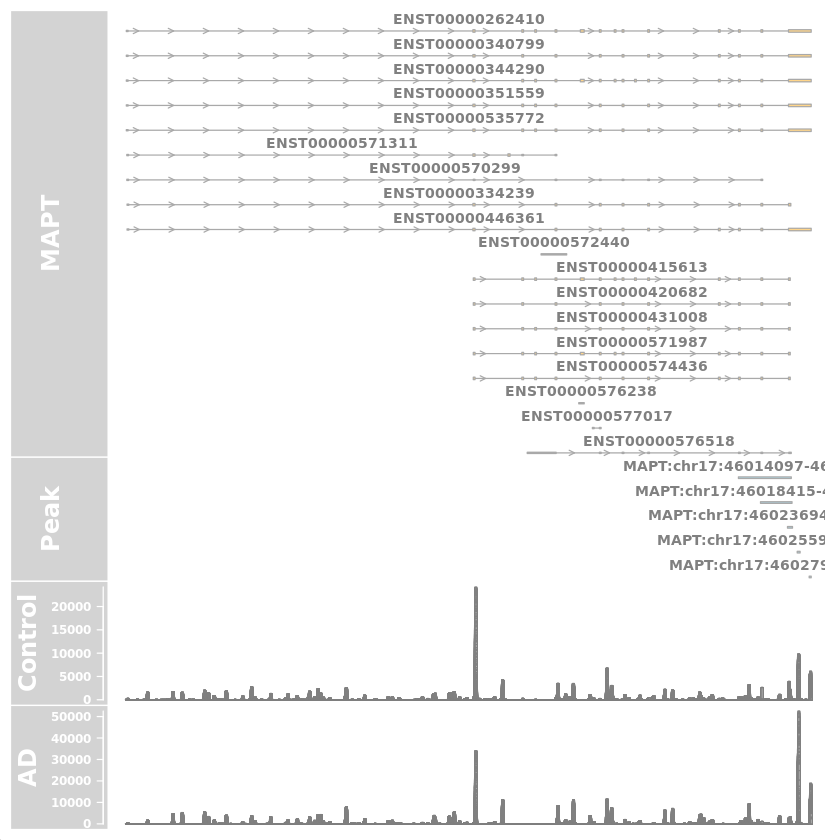

In [208]:
peaks.to.plot <- rownames(subset(res.table, gene_name == "MAPT"))
# names(peaks.to.plot) <- c("Peak 1", "Peak 2", "Peak 3")
# PlotCoverage(genome_gr = gtf_gr, 
#              geneSymbol = "STMN2", 
#              genome = "GRCh38",
#              bamfiles = bamfiles,
#              bamfile.tracknames = c("Control", "AD"),
#              peaks.annot = peaks.to.plot,
#              annotation.fontsize = 14,label.transcripts = T,
#              pdf_output = TRUE,
#              output_file_name = "results/STMN2_AD_CT_exp_Tract.pdf")

PlotCoverage(genome_gr = gtf_gr, 
             geneSymbol = "MAPT", 
             genome = "GRCh38",
             bamfiles = bamfiles,
             bamfile.tracknames = c("Control", "AD"),
             peaks.annot = peaks.to.plot,
             annotation.fontsize = 14,label.transcripts = T)

In [62]:
unique(gtf_gr$type)

[1] gene           transcript     exon           CDS            start_codon   
[6] stop_codon     UTR            Selenocysteine
8 Levels: gene transcript exon CDS start_codon stop_codon ... Selenocysteine

In [438]:
# peaks.to.plot <- rownames(subset(res.table, gene_name == "MAPT"))
PlotCoverage(genome_gr = gtf_gr, 
             geneSymbol = "ACSL4", 
             genome = "hg38",
             bamfiles = bamlist,
            bamfile.tracknames = c(rep("Control",10),rep("AD",9)),
             peaks.annot = peaks_to_plot,
             annotation.fontsize = 14,label.transcripts = T,
             pdf_output = TRUE,
             output_file_name = "results/track_plots/ACSL4_AD_CT_exp_Tract_sampleLevel.pdf")

Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


png 
  2

In [439]:
PlotCoverage(genome_gr = gtf_gr, 
             geneSymbol = "ACSL4", 
             genome = "GRCh38",
             bamfiles = bamfiles,
             bamfile.tracknames = c("Control", "AD"),
             peaks.annot = peaks_to_plot,
             annotation.fontsize = 14,label.transcripts = T,
            pdf_output = TRUE,
             output_file_name = "results/track_plots/ACSL4_AD_CT_exp_Tract_MetaLevel.pdf")

Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


png 
  2

In [85]:
### awesome, it seems that we are good to go now and do the motif discovery part!

In [95]:
peak.annotations <- read.table("sierra_AD_CT_mix/AD_CT_peaks_annotated.txt", 
                               header = TRUE,
                               sep = "\t",
                               row.names = 1,
                               stringsAsFactors = FALSE)

In [176]:
tmp_df <- data.frame(chr = peak.annotations[rownames(peak.annotations) %in% rownames(test.res),]['seqnames'],
                     geneID = peak.annotations[rownames(peak.annotations) %in% rownames(test.res),]['gene_id'],
                     width = peak.annotations[rownames(peak.annotations) %in% rownames(test.res),]['width'],
                     start_pos = peak.annotations[rownames(peak.annotations) %in% rownames(test.res),]['start'],
                     end_pos = peak.annotations[rownames(peak.annotations) %in% rownames(test.res),]['end'])
tmp_df

seqnames gene_id  width start     end      
GCC2:chr2:108448893-108470304:1     chr2     GCC2     21412 108448893 108470304
LUC7L:chr16:188969-189338:-1        chr16    LUC7L      370    188969    189338
LUC7L:chr16:220531-228380:-1        chr16    LUC7L     7850    220531    228380
IDS:chrX:149482241-149482553:-1     chrX     IDS        313 149482241 149482553
MATR3:chr5:139329964-139330511:1    chr5     MATR3      548 139329964 139330511
MATR3:chr5:139325409-139329874:1    chr5     MATR3     4466 139325409 139329874
NDUFS1:chr2:206123550-206127106:-1  chr2     NDUFS1    3557 206123550 206127106
RUFY3:chr4:70793087-70793613:1      chr4     RUFY3      527  70793087  70793613
GABRA1:chr5:161899535-161899981:1   chr5     GABRA1     447 161899535 161899981
LMO3:chr12:16550768-16550948:-1     chr12    LMO3       181  16550768  16550948
CNTN1:chr12:41071962-41072415:1     chr12    CNTN1      454  41071962  41072415
KPNA6:chr1:32176036-32176563:1      chr1     KPNA6      528  32176036  32176563
SFSWAP:chr12:131799015-131799737:1  chr12    SFSWAP     723 131799015 131799737
TRMT11:chr6:125998053-125999605:1   chr6     TRMT11    1553 125998053 125999605
EXOC5:chr14:57217947-57229925:-1    chr14    EXOC5    11979  57217947  57229925
MAP2K4:chr17:12143273-12143830:1    chr17    MAP2K4     558  12143273  12143830
DNAJA2:chr16:46956380-46956675:-1   chr16    DNAJA2     296  46956380  46956675
VPS35:chr16:46680589-46681491:-1    chr16    VPS35      903  46680589  46681491
CDK14:chr7:91210138-91210590:1      chr7     CDK14      453  91210138  91210590
MEF2A:chr15:99715918-99716466:1     chr15    MEF2A      549  99715918  99716466
PDE4A:chr19:10467424-10467973:1     chr19    PDE4A      550  10467424  10467973
PDE4A:chr19:10469207-10469630:1     chr19    PDE4A      424  10469207  10469630
CLCN4:chrX:10237210-10237660:1      chrX     CLCN4      451  10237210  10237660
CLCN4:chrX:10233648-10234103:1      chrX     CLCN4      456  10233648  10234103
NUCKS1:chr1:205718201-205719795:-1  chr1     NUCKS1    1595 205718201 205719795
NUAK1:chr12:106064801-106065302:-1  chr12    NUAK1      502 106064801 106065302
USP33:chr1:77713134-77714860:-1     chr1     USP33     1727  77713134  77714860
UBE2K:chr4:39777588-39778660:1      chr4     UBE2K     1073  39777588  39778660
SYT1:chr12:79451569-79452008:1      chr12    SYT1       440  79451569  79452008
SYT1:chr12:79449823-79450294:1      chr12    SYT1       472  79449823  79450294
⋮                                   ⋮        ⋮        ⋮     ⋮         ⋮        
DLGAP2:chr8:1707574-1708474:1       chr8     DLGAP2    901    1707574   1708474
DLGAP2:chr8:1680613-1681951:1       chr8     DLGAP2   1339    1680613   1681951
LSAMP:chr3:115802363-115803011:-1   chr3     LSAMP     649  115802363 115803011
PEG3:chr19:56810077-56810473:-1     chr19    PEG3      397   56810077  56810473
FAM3C:chr7:121349762-121350548:-1   chr7     FAM3C     787  121349762 121350548
CCNL2:chr1:1386460-1386652:-1       chr1     CCNL2     193    1386460   1386652
G3BP2:chr4:75642782-75643162:-1     chr4     G3BP2     381   75642782  75643162
SPOCK1:chr5:136978170-136978638:-1  chr5     SPOCK1    469  136978170 136978638
GOLGA8A:chr15:34379353-34379923:-1  chr15    GOLGA8A   571   34379353  34379923
RBM25:chr14:73102748-73103342:1     chr14    RBM25     595   73102748  73103342
NREP:chr5:111729558-111730603:-1    chr5     NREP     1046  111729558 111730603
PGM2L1:chr11:74335502-74336540:-1   chr11    PGM2L1   1039   74335502  74336540
CAPZB:chr1:19339066-19339882:-1     chr1     CAPZB     817   19339066  19339882
ATRX:chrX:77683686-77684573:-1      chrX     ATRX      888   77683686  77684573
RAB2A:chr8:60621441-60622148:1      chr8     RAB2A     708   60621441  60622148
CLCN3:chr4:169720341-169721355:1    chr4     CLCN3    1015  169720341 169721355
MAPK10:chr4:86013446-86014502:-1    chr4     MAPK10   1057   86013446  86014502
SCN2A:chr2:165391286-165392310:1    chr2     SCN2A    1025  165391286 165392310
RTN1:chr14:59596341-59596647:-1     

In [174]:
main_table <- test.res[1:9]
main_table

genomic_feature(s) population1_pct
SYT1:chr12:79451569-79452008:1     UTR3               0.74560352     
STMN2:chr8:79665711-79666175:1     UTR3               0.39861444     
STMN2:chr8:79665467-79665761:1     UTR3               0.08113509     
SEPTIN7:chr7:35904888-35905371:1   UTR3               0.36850520     
YWHAH:chr22:31957136-31957603:1    UTR3               0.60045297     
FAM171B:chr2:186765479-186765959:1 UTR3               0.28430589     
PRNP:chr20:4701170-4701590:1       UTR3               0.72222222     
TUBB3:chr16:89935919-89936087:1    UTR3               0.37416733     
TUBB3:chr16:89935880-89936110:1    UTR3               0.38169464     
CALM1:chr14:90407831-90408268:1    UTR3               0.73494538     
CALM1:chr14:90407982-90408198:1    UTR3               0.69670930     
CALM1:chr14:90405127-90405679:1    UTR3               0.33533173     
CALM1:chr14:90407665-90407839:1    UTR3               0.12769784     
CALM1:chr14:90404697-90405075:1    UTR3               0.30475620     
SCOC:chr4:140382110-140382600:1    UTR3               0.24933387     
ATP1B1:chr1:169132205-169132722:1  UTR3               0.73647748     
ATP1B1:chr1:169132156-169132324:1  UTR3               0.25766054     
ATP1B1:chr1:169131694-169132162:1  UTR3               0.10551559     
CADM3:chr1:159201539-159202102:1   UTR3               0.26871836     
R3HDM1:chr2:135724847-135725270:1  UTR3               0.35358380     
PIK3R1:chr5:68301506-68301821:1    UTR3               0.21316280     
PIK3R1:chr5:68298077-68298887:1    UTR3               0.36097788     
PIK3R1:chr5:68297774-68298326:1    UTR3               0.12436717     
SRSF5:chr14:69771517-69772005:1    UTR3               0.36057820     
SRSF5:chr14:69771090-69771846:1    UTR3               0.33313349     
SRSF5:chr14:69771273-69771681:1    UTR3               0.23614442     
CAMTA1:chr1:7769275-7769706:1      UTR3               0.28024247     
SUB1:chr5:32603641-32604079:1      UTR3               0.16340261     
PTMA:chr2:231713071-231713541:1    UTR3               0.42226219     
PTMA:chr2:231712884-231713196:1    UTR3               0.20776712     
⋮                                  ⋮                  ⋮              
TMEM150C:chr4:82483731-82484326:-1 UTR3               0.05435651     
MYT1L:chr2:1923166-1943329:-1      UTR3               0.05422329     
CYCS:chr7:25123211-25124526:-1     UTR3               0.05135891     
CYCS:chr7:25123233-25123431:-1     UTR3               0.03050893     
CYCS:chr7:25123206-25123553:-1     UTR3               0.03823608     
KIF3C:chr2:25927720-25928236:-1    UTR3               0.05648814     
KCNQ2:chr20:63405889-63406544:-1   UTR3               0.08000266     
UBE2D3:chr4:102796202-102796376:-1 UTR3               0.05921929     
UBE2D3:chr4:102796392-102797160:-1 UTR3               0.05122569     
UBE2D3:chr4:102794383-102794757:-1 UTR3               0.06274980     
UBE3A:chr15:25340012-25340294:-1   UTR3               0.07081002     
SCAI:chr9:124942608-124943004:-1   UTR3               0.10198508     
TEX2:chr17:64147595-64148153:-1    UTR3               0.06521450     
AGAP2:chr12:57723761-57724319:-1   UTR3               0.08013589     
ANXA7:chr10:73375595-73376249:-1   UTR3               0.11117772     
ANXA7:chr10:73375703-73376213:-1   UTR3               0.07553957     
AKT3:chr1:243501672-243502208:-1   UTR3               0.06674660     
TMEM59:chr1:54032069-54032393:-1   UTR3               0.04070077     
ANKS1B:chr12:98745358-98745893:-1  UTR3               0.14048761     
SMIM7:chr19:16646033-16646682:-1   UTR3               0.04196643     
RETREG1:chr5:16473038-16473432:-1  UTR3               0.09798828     
GOT1:chr10:99397226-99397747:-1    UTR3               0.03244071     
DLG1:chr3:197138266-197149858:-1   UTR3               0.09299227     
XPO1:chr2:61526311-61534030:-1     UTR3               0.05815348     
DBN1:chr5:177456955-177457935:-1   UTR3               0.10524913     
IMMT:chr2:86171085-86181312:-1     UTR3      

In [180]:
final_table <- merge(main_table,tmp_df, by = 0) 
final_table

Row.names                            genomic_feature(s) population1_pct
1    AAK1:chr2:69457997-69458345:-1       UTR3               0.12083666     
2    AAK1:chr2:69467892-69468666:-1       UTR3               0.08493205     
3    AASDH:chr4:56377622-56378438:-1      UTR3               0.11670663     
4    AASDHPPT:chr11:106090665-106097237:1 UTR3               0.04742872     
5    AASDHPPT:chr11:106094460-106097203:1 UTR3               0.03963496     
6    AASDHPPT:chr11:106096601-106097203:1 UTR3               0.03443912     
7    AASDHPPT:chr11:106096738-106097122:1 UTR3               0.03357314     
8    AASDHPPT:chr11:106098066-106098699:1 UTR3               0.18645084     
9    AATK:chr17:81113887-81114698:-1      UTR3               0.13815614     
10   AATK:chr17:81117239-81117752:-1      UTR3               0.31501465     
11   ABI2:chr2:203429991-203430621:1      UTR3               0.03177458     
12   ABI2:chr2:203431237-203431795:1      UTR3               0.16133760     
13   ABI2:chr2:203431739-203432287:1      UTR3               0.24127365     
14   ACSL3:chr2:222934380-222941904:1     UTR3               0.03690381     
15   ACSL3:chr2:222941603-222942419:1     UTR3               0.08633094     
16   ACSL3:chr2:222944194-222944639:1     UTR3               0.13016254     
17   ACSL4:chrX:109641293-109641769:-1    UTR3               0.14501732     
18   ACSL4:chrX:109643524-109663291:-1    UTR3               0.01578737     
19   ACSL6:chr5:131949973-131950388:-1    UTR3               0.20856648     
20   ACSL6:chr5:131950448-131951097:-1    UTR3               0.04622968     
21   ACTR2:chr2:65269605-65270355:1       UTR3               0.08180123     
22   ACTR2:chr2:65270846-65271253:1       UTR3               0.20170530     
23   ACTR3:chr2:113951795-113957899:1     UTR3               0.02691180     
24   ACTR3:chr2:113957658-113958387:1     UTR3               0.08659739     
25   ACTR3B:chr7:152854432-152855086:1    UTR3               0.04676259     
26   ACTR3B:chr7:152854965-152855378:1    UTR3               0.14701572     
27   ADAM23:chr2:206609902-206617966:1    UTR3               0.06514788     
28   ADAM23:chr2:206617501-206617993:1    UTR3               0.04689582     
29   ADAM23:chr2:206620471-206621127:1    UTR3               0.18345324     
30   ADCY1:chr7:45719818-45720647:1       UTR3               0.09892086     
⋮    ⋮                                    ⋮                  ⋮              
1650 YWHAB:chr20:44906962-44907535:1      UTR3               0.08726352     
1651 YWHAG:chr7:76327240-76327720:-1      UTR3               0.05722089     
1652 YWHAG:chr7:76328709-76329159:-1      UTR3               0.05035971     
1653 YWHAH:chr22:31944522-31956286:1      UTR3               0.15794031     
1654 YWHAH:chr22:31957136-31957603:1      UTR3               0.60045297     
1655 YWHAQ:chr2:9583967-9584393:-1        UTR3               0.24134026     
1656 YWHAQ:chr2:9584231-9584915:-1        UTR3               0.12136957     
1657 YWHAZ:chr8:100918520-100919263:-1    UTR3               0.31721290     
1658 YWHAZ:chr8:100920105-100920382:-1    UTR3               0.02271516     
1659 YY1:chr14:100277577-100278357:1      UTR3               0.05975220     
1660 YY1:chr14:100282326-100282788:1      UTR3               0.10258460     
1661 ZBTB16:chr11:114255785-114255971:1   UTR3               0.11277645     
1662 ZBTB8OS:chr1:32621726-32634130:-1    UTR3               0.13669065     
1663 ZCCHC17:chr1:31337111-31364246:1     UTR3               0.08533173     
1664 ZCCHC17:chr1:31364468-31364953:1     UTR3               0.09312550     
1665 ZDHHC14:chr6:157673072-157673574:1   UTR3               0.04869438     
1666 ZDHHC8:chr22:20145992-20146500:1     UTR3               0.10451639     
1667 ZDHHC8:chr22:20147551-20148007:1     UTR3               0.06321609     
1668 ZFAND5:chr9:72354384-72354905:-1     UTR3               0.32567280     
1669 ZFAND5:chr9:72355575-72356219:-1     UTR3               0.01305622     
1

In [99]:
write.table(test.res, file='results/UTR_shift_Excitatory_Neurons_ADvsCT.tsv', sep='\t', quote=F)

In [105]:
## now lets plot the coverage plots for all the genes ;-) 
for (gene in unlist(unique(test.res['geneID']))){
    print(gene)
    peaks.to.plot <- rownames(subset(res.table, gene_name == gene))
    PlotCoverage(genome_gr = gtf_gr, 
             geneSymbol = gene, 
             genome = "hg38",
             bamfiles = bamlist,
            bamfile.tracknames = c(rep("Control",10),rep("AD",9)),
             peaks.annot = peaks.to.plot,
             annotation.fontsize = 14,label.transcripts = T,
             pdf_output = TRUE,
             output_file_name = paste0("results/track_plots/", gene, "_AD_CT_exp_Tract_sampleLevel.pdf"))
                 
    PlotCoverage(genome_gr = gtf_gr, 
             geneSymbol = gene, 
             genome = "GRCh38",
             bamfiles = bamfiles,
             bamfile.tracknames = c("Control", "AD"),
             peaks.annot = peaks.to.plot,
             annotation.fontsize = 14,label.transcripts = T,
            pdf_output = TRUE,
            output_file_name = paste0("results/track_plots/", gene, "_AD_CT_exp_Tract_MetaCellLevel.pdf"))
}

[1] "GCC2"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "LUC7L"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "IDS"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "MATR3"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "NDUFS1"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "RUFY3"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "GABRA1"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "LMO3"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "CNTN1"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "KPNA6"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "SFSWAP"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "TRMT11"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "EXOC5"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "MAP2K4"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "DNAJA2"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "VPS35"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "CDK14"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "MEF2A"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "PDE4A"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "CLCN4"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "NUCKS1"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "NUAK1"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "USP33"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "UBE2K"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "SYT1"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "XPO1"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


[1] "DLG1"


Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."


ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'from': error in evaluating the argument 'subject' in selecting a method for function 'findOverlaps': error in evaluating the argument 'x' in selecting a method for function 'resize': [[ subscript must be >= 1


In [119]:
## lets evaluate the peaks for AD vs CT
tmp_df <- test.res %>% filter(Log2_fold_change >= 0.5)
write.table(tmp_df['geneID'], file='results/upgenes_test.txt', row.names = F, col.names=F, quote=F)

In [120]:
test.res

genomic_feature(s) population1_pct
SYT1:chr12:79451569-79452008:1     UTR3               0.74560352     
STMN2:chr8:79665711-79666175:1     UTR3               0.39861444     
STMN2:chr8:79665467-79665761:1     UTR3               0.08113509     
SEPTIN7:chr7:35904888-35905371:1   UTR3               0.36850520     
YWHAH:chr22:31957136-31957603:1    UTR3               0.60045297     
FAM171B:chr2:186765479-186765959:1 UTR3               0.28430589     
PRNP:chr20:4701170-4701590:1       UTR3               0.72222222     
TUBB3:chr16:89935919-89936087:1    UTR3               0.37416733     
TUBB3:chr16:89935880-89936110:1    UTR3               0.38169464     
CALM1:chr14:90407831-90408268:1    UTR3               0.73494538     
CALM1:chr14:90407982-90408198:1    UTR3               0.69670930     
CALM1:chr14:90405127-90405679:1    UTR3               0.33533173     
CALM1:chr14:90407665-90407839:1    UTR3               0.12769784     
CALM1:chr14:90404697-90405075:1    UTR3               0.30475620     
SCOC:chr4:140382110-140382600:1    UTR3               0.24933387     
ATP1B1:chr1:169132205-169132722:1  UTR3               0.73647748     
ATP1B1:chr1:169132156-169132324:1  UTR3               0.25766054     
ATP1B1:chr1:169131694-169132162:1  UTR3               0.10551559     
CADM3:chr1:159201539-159202102:1   UTR3               0.26871836     
R3HDM1:chr2:135724847-135725270:1  UTR3               0.35358380     
PIK3R1:chr5:68301506-68301821:1    UTR3               0.21316280     
PIK3R1:chr5:68298077-68298887:1    UTR3               0.36097788     
PIK3R1:chr5:68297774-68298326:1    UTR3               0.12436717     
SRSF5:chr14:69771517-69772005:1    UTR3               0.36057820     
SRSF5:chr14:69771090-69771846:1    UTR3               0.33313349     
SRSF5:chr14:69771273-69771681:1    UTR3               0.23614442     
CAMTA1:chr1:7769275-7769706:1      UTR3               0.28024247     
SUB1:chr5:32603641-32604079:1      UTR3               0.16340261     
PTMA:chr2:231713071-231713541:1    UTR3               0.42226219     
PTMA:chr2:231712884-231713196:1    UTR3               0.20776712     
⋮                                  ⋮                  ⋮              
TMEM150C:chr4:82483731-82484326:-1 UTR3               0.05435651     
MYT1L:chr2:1923166-1943329:-1      UTR3               0.05422329     
CYCS:chr7:25123211-25124526:-1     UTR3               0.05135891     
CYCS:chr7:25123233-25123431:-1     UTR3               0.03050893     
CYCS:chr7:25123206-25123553:-1     UTR3               0.03823608     
KIF3C:chr2:25927720-25928236:-1    UTR3               0.05648814     
KCNQ2:chr20:63405889-63406544:-1   UTR3               0.08000266     
UBE2D3:chr4:102796202-102796376:-1 UTR3               0.05921929     
UBE2D3:chr4:102796392-102797160:-1 UTR3               0.05122569     
UBE2D3:chr4:102794383-102794757:-1 UTR3               0.06274980     
UBE3A:chr15:25340012-25340294:-1   UTR3               0.07081002     
SCAI:chr9:124942608-124943004:-1   UTR3               0.10198508     
TEX2:chr17:64147595-64148153:-1    UTR3               0.06521450     
AGAP2:chr12:57723761-57724319:-1   UTR3               0.08013589     
ANXA7:chr10:73375595-73376249:-1   UTR3               0.11117772     
ANXA7:chr10:73375703-73376213:-1   UTR3               0.07553957     
AKT3:chr1:243501672-243502208:-1   UTR3               0.06674660     
TMEM59:chr1:54032069-54032393:-1   UTR3               0.04070077     
ANKS1B:chr12:98745358-98745893:-1  UTR3               0.14048761     
SMIM7:chr19:16646033-16646682:-1   UTR3               0.04196643     
RETREG1:chr5:16473038-16473432:-1  UTR3               0.09798828     
GOT1:chr10:99397226-99397747:-1    UTR3               0.03244071     
DLG1:chr3:197138266-197149858:-1   UTR3               0.09299227     
XPO1:chr2:61526311-61534030:-1     UTR3               0.05815348     
DBN1:chr5:177456955-177457935:-1   UTR3               0.10524913     
IMMT:chr2:86171085-86181312:-1     UTR3      

In [146]:
## get the relative locoation and you can decide on the distal vs proximal 
get_relative_pos <- function(pos,sitNum){
    relative_loc <- (pos - 1) / (sitNum -1)
    return(relative_loc)
}

In [131]:
list(paste0(tmp_df['SiteLocation'],tmp_df['NumSites']))

[[1]]
[1] "c(6, 5, 2, 2, 4, 3, 10, 11, 8, 9, 5, 7, 6, 3, 3, 4, 2, 1, 3, 1, 2, 5, 5, 4, 6, 5, 8, 4, 3, 2, 6, 5, 5, 3, 4, 2, 2, 4, 3, 3, 2, 7, 2, 3, 5, 2, 4, 1, 2, 1, 3, 3, 5, 3, 1, 5, 1, 4, 5, 4, 5, 6, 7, 8, 9, 4, 3, 2, 2, 4, 7, 6, 4, 2, 3, 2, 3, 3, 2, 4, 3, 2, 3, 3, 5, 1, 3, 3, 6, 3, 2, 3, 3, 3, 4, 2, 2, 3, 2, 1, 2, 3, 4, 2, 4, 11, 2, 5, 6, 4, 3, 6, 5, 5, 5, 3, 3, 6, 4, 3, 5, 1, 3, 2, 2, 3, 4, 10, 2, 5, 2, 3, 2, 3, 2, 2, 2, 1, 3, 4, 5, 6, 5, 2, 1, 5, 4, 3, 1, 2, 2, 4, 1, 1, 2, 4, 3, 2, 2, 5, 4, 6, 4, 2, 2, \n6, 2, 3, 4, 5, 4, 3, 7, 3, 3, 4, 6, 2, 2, 3, 6, 1, 2, 10, 6, 2, 7, 10, 8, 5, 7, 3, 4, 6, 2, 3, 4, 3, 2, 3, 8, 5, 5, 2, 2, 5, 1, 2, 5, 3, 2, 4, 3, 5, 4, 4, 13, 12, 10, 5, 4, 3, 3, 1, 3, 2, 5, 2, 8, 2, 7, 4, 3, 3, 3, 3, 3, 5, 6, 4, 2, 2, 2, 3, 2, 4, 2, 4, 6, 6, 2, 2, 4, 2, 3, 2, 2, 5, 4, 5, 1, 4, 3, 1, 5, 3, 4, 3, 2, 3, 2, 2, 3, 2, 2, 4, 3, 2, 3, 3, 2, 3, 2, 2, 1, 3, 3, 3, 2, 2, 1, 6, 3, 3, 2, 7, 2, 3, 4, 3, 5, 3, 5, 4, 3, 2, 1, 2, 3, 1, 7, 6, 1, 4, 1, 4, 2, 4, 2, 1, 4, 4, 3, 1, 3, 4, 2, 5, 1, 2, 2, \n7, 3)c(6, 6, 2, 2, 4, 4, 11, 11, 11, 11, 5, 7, 7, 3, 3, 4, 4, 4, 3, 3, 3, 5, 5, 4, 6, 5, 8, 4, 3, 2, 6, 6, 5, 3, 4, 2, 2, 4, 4, 3, 2, 7, 3, 3, 5, 5, 5, 5, 2, 2, 3, 3, 5, 3, 6, 6, 2, 6, 6, 5, 5, 7, 7, 9, 9, 4, 3, 2, 2, 4, 7, 7, 4, 3, 3, 2, 3, 3, 3, 4, 5, 2, 3, 3, 5, 5, 3, 3, 6, 3, 3, 4, 3, 3, 4, 2, 2, 3, 2, 3, 3, 3, 4, 2, 4, 11, 2, 11, 11, 4, 4, 6, 6, 5, 5, 3, 4, 6, 4, 3, 5, 3, 3, 2, 4, 4, 4, 11, 2, 5, 2, 3, 4, 3, 3, 2, 2, 2, 3, 4, 5, 6, 6, 2, 2, 6, 6, 3, 3, 2, 2, 4, 4, 2, 2, 4, 3, 2, 2, 5, 5, 6, 4, 3, \n2, 6, 2, 3, 4, 5, 5, 4, 7, 3, 3, 5, 6, 2, 3, 3, 6, 2, 2, 10, 6, 2, 7, 10, 10, 10, 10, 10, 10, 10, 10, 3, 4, 3, 3, 3, 8, 5, 5, 2, 2, 5, 3, 2, 5, 3, 2, 4, 5, 5, 5, 4, 16, 16, 10, 5, 4, 3, 3, 3, 3, 2, 5, 2, 8, 2, 7, 4, 3, 3, 3, 3, 3, 8, 8, 4, 2, 2, 6, 6, 2, 4, 2, 4, 6, 6, 2, 2, 4, 2, 4, 4, 2, 5, 5, 9, 3, 4, 4, 5, 5, 3, 4, 3, 2, 3, 2, 2, 3, 2, 2, 4, 5, 4, 4, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 6, 7, 3, 2, 7, 2, 3, 5, 3, 5, 3, 5, 5, 5, 3, 3, 3, 3, 3, 8, 8, 4, 4, 4, 4, 2, 4, 3, 3, 5, 6, 3, 2, 3, 8, 2, \n6, 2, 3, 4, 7, 3)"

In [147]:
test.res['peak_relative_postion'] <- mapply(get_relative_pos,test.res$SiteLocation,test.res$NumSites)
test.res

genomic_feature(s) population1_pct
SYT1:chr12:79451569-79452008:1     UTR3               0.74560352     
STMN2:chr8:79665711-79666175:1     UTR3               0.39861444     
STMN2:chr8:79665467-79665761:1     UTR3               0.08113509     
SEPTIN7:chr7:35904888-35905371:1   UTR3               0.36850520     
YWHAH:chr22:31957136-31957603:1    UTR3               0.60045297     
FAM171B:chr2:186765479-186765959:1 UTR3               0.28430589     
PRNP:chr20:4701170-4701590:1       UTR3               0.72222222     
TUBB3:chr16:89935919-89936087:1    UTR3               0.37416733     
TUBB3:chr16:89935880-89936110:1    UTR3               0.38169464     
CALM1:chr14:90407831-90408268:1    UTR3               0.73494538     
CALM1:chr14:90407982-90408198:1    UTR3               0.69670930     
CALM1:chr14:90405127-90405679:1    UTR3               0.33533173     
CALM1:chr14:90407665-90407839:1    UTR3               0.12769784     
CALM1:chr14:90404697-90405075:1    UTR3               0.30475620     
SCOC:chr4:140382110-140382600:1    UTR3               0.24933387     
ATP1B1:chr1:169132205-169132722:1  UTR3               0.73647748     
ATP1B1:chr1:169132156-169132324:1  UTR3               0.25766054     
ATP1B1:chr1:169131694-169132162:1  UTR3               0.10551559     
CADM3:chr1:159201539-159202102:1   UTR3               0.26871836     
R3HDM1:chr2:135724847-135725270:1  UTR3               0.35358380     
PIK3R1:chr5:68301506-68301821:1    UTR3               0.21316280     
PIK3R1:chr5:68298077-68298887:1    UTR3               0.36097788     
PIK3R1:chr5:68297774-68298326:1    UTR3               0.12436717     
SRSF5:chr14:69771517-69772005:1    UTR3               0.36057820     
SRSF5:chr14:69771090-69771846:1    UTR3               0.33313349     
SRSF5:chr14:69771273-69771681:1    UTR3               0.23614442     
CAMTA1:chr1:7769275-7769706:1      UTR3               0.28024247     
SUB1:chr5:32603641-32604079:1      UTR3               0.16340261     
PTMA:chr2:231713071-231713541:1    UTR3               0.42226219     
PTMA:chr2:231712884-231713196:1    UTR3               0.20776712     
⋮                                  ⋮                  ⋮              
TMEM150C:chr4:82483731-82484326:-1 UTR3               0.05435651     
MYT1L:chr2:1923166-1943329:-1      UTR3               0.05422329     
CYCS:chr7:25123211-25124526:-1     UTR3               0.05135891     
CYCS:chr7:25123233-25123431:-1     UTR3               0.03050893     
CYCS:chr7:25123206-25123553:-1     UTR3               0.03823608     
KIF3C:chr2:25927720-25928236:-1    UTR3               0.05648814     
KCNQ2:chr20:63405889-63406544:-1   UTR3               0.08000266     
UBE2D3:chr4:102796202-102796376:-1 UTR3               0.05921929     
UBE2D3:chr4:102796392-102797160:-1 UTR3               0.05122569     
UBE2D3:chr4:102794383-102794757:-1 UTR3               0.06274980     
UBE3A:chr15:25340012-25340294:-1   UTR3               0.07081002     
SCAI:chr9:124942608-124943004:-1   UTR3               0.10198508     
TEX2:chr17:64147595-64148153:-1    UTR3               0.06521450     
AGAP2:chr12:57723761-57724319:-1   UTR3               0.08013589     
ANXA7:chr10:73375595-73376249:-1   UTR3               0.11117772     
ANXA7:chr10:73375703-73376213:-1   UTR3               0.07553957     
AKT3:chr1:243501672-243502208:-1   UTR3               0.06674660     
TMEM59:chr1:54032069-54032393:-1   UTR3               0.04070077     
ANKS1B:chr12:98745358-98745893:-1  UTR3               0.14048761     
SMIM7:chr19:16646033-16646682:-1   UTR3               0.04196643     
RETREG1:chr5:16473038-16473432:-1  UTR3               0.09798828     
GOT1:chr10:99397226-99397747:-1    UTR3               0.03244071     
DLG1:chr3:197138266-197149858:-1   UTR3               0.09299227     
XPO1:chr2:61526311-61534030:-1     UTR3               0.05815348     
DBN1:chr5:177456955-177457935:-1   UTR3               0.10524913     
IMMT:chr2:86171085-86181312:-1     UTR3      

In [149]:
### now you can get the genes that are upregulated the longer isoforms relative_pos > 0.5
### vs downregulated shorter onse relative_pos < 0.5

AD_up_long <- test.res %>% filter(FC_direction=='Up') %>% filter(peak_relative_postion >= 0.5)
AD_up_long

genomic_feature(s) population1_pct
SYT1:chr12:79451569-79452008:1       UTR3               0.74560352     
STMN2:chr8:79665711-79666175:1       UTR3               0.39861444     
STMN2:chr8:79665467-79665761:1       UTR3               0.08113509     
SEPTIN7:chr7:35904888-35905371:1     UTR3               0.36850520     
YWHAH:chr22:31957136-31957603:1      UTR3               0.60045297     
FAM171B:chr2:186765479-186765959:1   UTR3               0.28430589     
PRNP:chr20:4701170-4701590:1         UTR3               0.72222222     
TUBB3:chr16:89935919-89936087:1      UTR3               0.37416733     
TUBB3:chr16:89935880-89936110:1      UTR3               0.38169464     
CALM1:chr14:90407831-90408268:1      UTR3               0.73494538     
CALM1:chr14:90407982-90408198:1      UTR3               0.69670930     
CALM1:chr14:90405127-90405679:1      UTR3               0.33533173     
CALM1:chr14:90407665-90407839:1      UTR3               0.12769784     
CALM1:chr14:90404697-90405075:1      UTR3               0.30475620     
SCOC:chr4:140382110-140382600:1      UTR3               0.24933387     
ATP1B1:chr1:169132205-169132722:1    UTR3               0.73647748     
ATP1B1:chr1:169132156-169132324:1    UTR3               0.25766054     
ATP1B1:chr1:169131694-169132162:1    UTR3               0.10551559     
CADM3:chr1:159201539-159202102:1     UTR3               0.26871836     
R3HDM1:chr2:135724847-135725270:1    UTR3               0.35358380     
PIK3R1:chr5:68301506-68301821:1      UTR3               0.21316280     
SRSF5:chr14:69771517-69772005:1      UTR3               0.36057820     
SRSF5:chr14:69771273-69771681:1      UTR3               0.23614442     
CAMTA1:chr1:7769275-7769706:1        UTR3               0.28024247     
SUB1:chr5:32603641-32604079:1        UTR3               0.16340261     
PTMA:chr2:231713071-231713541:1      UTR3               0.42226219     
PTMA:chr2:231712975-231713095:1      UTR3               0.11051159     
CNTN1:chr12:41071962-41072415:1      UTR3               0.39961364     
RTN3:chr11:63758216-63759538:1       UTR3               0.42492673     
RTN3:chr11:63758644-63759192:1       UTR3               0.19990674     
⋮                                    ⋮                  ⋮              
CELF1:chr11:47465956-47466077:-1     UTR3               0.21975753     
CELF1:chr11:47466005-47466047:-1     UTR3               0.17998934     
ASH1L:chr1:155335268-155335588:-1    UTR3               0.12796430     
DCAF8:chr1:160215715-160216077:-1    UTR3               0.12123634     
SMG1:chr16:18804853-18805249:-1      UTR3               0.10211831     
KIAA0408:chr6:127440968-127441517:-1 UTR3               0.09652278     
UBE2D3:chr4:102795600-102796226:-1   UTR3               0.13902212     
POLR2J3:chr7:102564307-102564835:-1  UTR3               0.15354383     
ELL2:chr5:95885098-95885451:-1       UTR3               0.08126832     
APOL2:chr22:36226209-36226539:-1     UTR3               0.11530775     
KIAA1549:chr7:138831381-138831740:-1 UTR3               0.08193445     
AASDH:chr4:56377622-56378438:-1      UTR3               0.11670663     
FEZ2:chr2:36578634-36581532:-1       UTR3               0.13542499     
ANKRD36B:chr2:97551142-97555425:-1   UTR3               0.09252598     
OSBPL1A:chr18:24162045-24162389:-1   UTR3               0.14801492     
DUSP6:chr12:89347982-89348508:-1     UTR3               0.10818012     
NFIB:chr9:14087449-14088115:-1       UTR3               0.07660538     
CORO6:chr17:29614816-29614870:-1     UTR3               0.13562483     
MTIF3:chr13:27435643-27440323:-1     UTR3               0.11790568     
CCNL2:chr1:1386460-1386652:-1        UTR3               0.11843858     
PDIA6:chr2:10783391-10783772:-1      UTR3               0.06941114     
DNAJC19:chr3:180983709-180984561:-1  UTR3               0.05362377     
NAP1L1:chr12:76046120-76046612:-1    UTR3               0.09272582     
NAP1L1:chr12:76044636-76045482:-1    UTR3               0.09598987     
NIN:c

In [153]:
## write the genes name so we get the full UTR3s from UCSC genome browser
write.table(AD_up_long['geneID'], file='results/AD_longUTR_genes_up_regulated.tsv',
     row.names= F, col.names=F, quote=F)

In [199]:
sig_df <- final_table %>% filter(Log2_fold_change >= .5)
sig_df['peak_relative_postion'] <- mapply(get_relative_pos,sig_df$SiteLocation,sig_df$NumSites)
sig_df_df <- sig_df %>% filter(peak_relative_postion >= 0.5)
sig_df_df

Row.names                            genomic_feature(s) population1_pct
1   AAK1:chr2:69457997-69458345:-1       UTR3               0.12083666     
2   AASDHPPT:chr11:106098066-106098699:1 UTR3               0.18645084     
3   ABI2:chr2:203431739-203432287:1      UTR3               0.24127365     
4   ACSL4:chrX:109641293-109641769:-1    UTR3               0.14501732     
5   ADAM23:chr2:206620471-206621127:1    UTR3               0.18345324     
6   ADCY1:chr7:45722664-45723116:1       UTR3               0.31554756     
7   ADD3:chr10:110135089-110135565:1     UTR3               0.10051958     
8   AMD1:chr6:110895230-110895814:1      UTR3               0.11304290     
9   ANKRD36C:chr2:95857460-95880654:-1   UTR3               0.50133227     
10  ARF3:chr12:48936123-48936679:-1      UTR3               0.30602185     
11  ARGLU1:chr13:106541673-106542154:-1  UTR3               0.11843858     
12  ARHGAP21:chr10:24583609-24583990:-1  UTR3               0.26052491     
13  ARL6IP5:chr3:69105380-69105734:1     UTR3               0.06428191     
14  ARL6IP5:chr3:69105641-69106092:1     UTR3               0.13276046     
15  ARPP19:chr15:52547045-52547740:-1    UTR3               0.29769518     
16  ATP1B1:chr1:169132156-169132324:1    UTR3               0.25766054     
17  ATP1B1:chr1:169132205-169132722:1    UTR3               0.73647748     
18  ATP5F1D:chr19:1244441-1244735:1      UTR3               0.12183586     
19  ATP5IF1:chr1:28237663-28237835:1     UTR3               0.07394085     
20  ATRNL1:chr10:115948534-115948999:1   UTR3               0.15594191     
21  ATRX:chrX:77681758-77682319:-1       UTR3               0.17699174     
22  ATRX:chrX:77681793-77682981:-1       UTR3               0.24806821     
23  ATXN7L3B:chr12:74541048-74541498:1   UTR3               0.20203837     
24  BCLAF1:chr6:136258454-136259102:-1   UTR3               0.08779643     
25  BTBD8:chr1:92184291-92184725:1       UTR3               0.21356248     
26  C2CD5:chr12:22448583-22448931:-1     UTR3               0.17952305     
27  C4orf3:chr4:119296851-119297577:-1   UTR3               0.16306954     
28  CA10:chr17:51630313-51630715:-1      UTR3               0.11317613     
29  CACNG8:chr19:53989733-53990215:1     UTR3               0.27844391     
30  CADM2:chr3:86073143-86073857:1       UTR3               0.16087130     
⋮   ⋮                                    ⋮                  ⋮              
260 TMEM132B:chr12:125661899-125662377:1 UTR3               0.07926992     
261 TMEM181:chr6:158634967-158635428:1   UTR3               0.15374367     
262 TMEM30A:chr6:75252924-75253266:-1    UTR3               0.27857714     
263 TMEM50A:chr1:25361891-25362361:1     UTR3               0.11317613     
264 TMX4:chr20:7977346-7977709:-1        UTR3               0.18705036     
265 TNRC6B:chr22:40335386-40335808:1     UTR3               0.25373035     
266 TPM3:chr1:154156253-154156811:-1     UTR3               0.13109512     
267 TRIM9:chr14:50975262-50975603:-1     UTR3               0.33733014     
268 TTBK2:chr15:42738912-42739412:-1     UTR3               0.22934985     
269 TTC14:chr3:180609826-180610072:1     UTR3               0.13495870     
270 TTC3:chr21:37202646-37203112:1       UTR3               0.35078604     
271 TTC37:chr5:95464368-95468045:-1      UTR3               0.11970424     
272 TTLL7:chr1:83865024-83865351:-1      UTR3               0.10031974     
273 TUBA4A:chr2:219249710-219250062:-1   UTR3               0.12010392     
274 TUBB:chr6:30724953-30725426:1        UTR3               0.08639755     
275 TUBB3:chr16:89935880-89936110:1      UTR3               0.38169464     
276 TUBB3:chr16:89935919-89936087:1      UTR3               0.37416733     
277 UBA52:chr19:18576984-18577550:1      UTR3               0.15873967     
278 UBE2K:chr4:39782313-39782792:1       UTR3               0.20063949     
279 UBE2L3:chr22:21623576-21624034:1     UTR3               0.13862244     
280 UBE2V1:chr20:50081145-50081259:-1    UTR3       

In [200]:
unique(sig_df['gene_id'])

gene_id 
1   AAK1    
2   AASDHPPT
3   ABI2    
4   ACSL4   
5   ADAM23  
6   ADCY1   
7   ADD3    
8   AMD1    
9   ANKRD36C
11  ARF3    
12  ARGLU1  
13  ARHGAP21
14  ARL6IP5 
16  ARPP19  
17  ATP1B1  
19  ATP5F1D 
20  ATP5IF1 
21  ATRNL1  
22  ATRX    
24  ATXN7L3B
25  BCLAF1  
26  BTBD8   
27  C2CD5   
28  C4orf3  
29  CA10    
30  CACNG8  
31  CADM2   
32  CADM3   
33  CALM1   
37  CALM3   
⋮   ⋮       
295 TERF2IP 
296 TESPA1  
297 TMEM132B
299 TMEM181 
300 TMEM30A 
301 TMEM50A 
302 TMX4    
303 TNRC6B  
304 TPM3    
306 TRIM9   
307 TTBK2   
308 TTC14   
310 TTC3    
312 TTC37   
314 TTLL7   
316 TUBA4A  
317 TUBB    
318 TUBB3   
320 UBA52   
321 UBE2K   
322 UBE2L3  
323 UBE2V1  
325 UFM1    
326 VEZT    
327 VSNL1   
329 WDR26   
330 ZCCHC17 
331 ZDHHC8  
332 ZMAT2   
333 ZMYND8

In [202]:
write.table(sig_df_df['gene_id'], file='results/Upregulated_longUTRs_in_AD.tsv' ,row.names=F, col.names=F, quote=F)

In [203]:
sig_df_df %>% filter(gene_id=='AAK1')

Row.names                      genomic_feature(s) population1_pct
1 AAK1:chr2:69457997-69458345:-1 UTR3               0.1208367      
  population2_pct pvalue       padj         Log2_fold_change SiteLocation
1 0.1130334       1.714053e-24 6.719706e-24 0.6669428        7           
  NumSites FC_direction seqnames gene_id width start    end     
1 7        Up           chr2     AAK1    349   69457997 69458345
  peak_relative_postion
1 1

In [206]:
write.table(sig_df_df, file='results/DE_UTR_peaks_df_in_AD.tsv',sep='\t',row.names=T, col.names=T, quote=F)

In [205]:
getwd()

[1] "/data/APAproject/post_qual/data/control_vs_pathology"

In [228]:
## learning
tst = 'AAK1:chr2:69457997-69458345:-1'
strand = sub("(.*):(.*):(.*)-(.*):(.*)", "\\2", tst)
strand

[1] "chr2"

In [229]:
sub(".*:(.*:.*-.*):.*", "\\1", tst)

[1] "chr2:69457997-69458345"

# next Chapter: 
## get the sequence of longer UTRs and analyze their motifs
## the UTRs I got from ensemble biomart or UCSC table is not fully mapping to my peaks 
## for problems like multi coordinate UTRS(biomart) and no gene_name in out put of UCSC table

## now what I will do is to generate bed file for the distance between the distal and proximal peaks (plus 1kb inward)  and then get fastas and analyse

In [234]:
## steps as follows:
## 1- get the multi peak genes >> basically get the peaks in UTR of 
##    a single gene ( one or more of them are significantly longer)
## 2- for each gene get the distance ( coordinates ) betweem the end of distal peaks 
##    and start of proximal peaks (+- 1kb based on strand)

## 3-  then conver to bed file and then get fasta with bedtools 
## 4- then do the motif analysis.

In [239]:
sig_df_df %>% filter(gene_id == 'ATRX') #ATP1B1

Row.names                      genomic_feature(s) population1_pct
1 ATRX:chrX:77681758-77682319:-1 UTR3               0.1769917      
2 ATRX:chrX:77681793-77682981:-1 UTR3               0.2480682      
  population2_pct pvalue        padj          Log2_fold_change SiteLocation
1 0.1494635       6.735967e-210 2.687343e-208 1.2903692        13          
2 0.2677368       3.752659e-158 9.426432e-157 0.8377982        12          
  NumSites FC_direction seqnames gene_id width start    end     
1 16       Up           chrX     ATRX     562  77681758 77682319
2 16       Up           chrX     ATRX    1189  77681793 77682981
  peak_relative_postion
1 0.8000000            
2 0.7333333

In [242]:
final_table %>% filter(gene_id=='AAK1')

Row.names                      genomic_feature(s) population1_pct
1 AAK1:chr2:69457997-69458345:-1 UTR3               0.12083666     
2 AAK1:chr2:69467892-69468666:-1 UTR3               0.08493205     
  population2_pct pvalue       padj         Log2_fold_change SiteLocation
1 0.1130334       1.714053e-24 6.719706e-24  0.6669428       7           
2 0.1400649       2.183316e-14 6.568240e-14 -0.3332589       3           
  NumSites FC_direction seqnames gene_id width start    end     
1 7        Up           chr2     AAK1    349   69457997 69458345
2 7        Down         chr2     AAK1    775   69467892 69468666

In [249]:
sig_df_low <- final_table %>% filter(Log2_fold_change <= -.5)
sig_df_low['peak_relative_postion'] <- mapply(get_relative_pos,sig_df_low$SiteLocation,
                                              sig_df_low$NumSites)
sig_df_low <- sig_df_low %>% filter(peak_relative_postion <= 0.5)
sig_df_low

Row.names                            genomic_feature(s) population1_pct
1   AASDHPPT:chr11:106090665-106097237:1 UTR3               0.04742872     
2   AASDHPPT:chr11:106094460-106097203:1 UTR3               0.03963496     
3   AASDHPPT:chr11:106096601-106097203:1 UTR3               0.03443912     
4   ABI2:chr2:203429991-203430621:1      UTR3               0.03177458     
5   ACSL3:chr2:222934380-222941904:1     UTR3               0.03690381     
6   ACSL4:chrX:109643524-109663291:-1    UTR3               0.01578737     
7   ACSL6:chr5:131950448-131951097:-1    UTR3               0.04622968     
8   ACTR2:chr2:65269605-65270355:1       UTR3               0.08180123     
9   ACTR3:chr2:113951795-113957899:1     UTR3               0.02691180     
10  ACTR3B:chr7:152854432-152855086:1    UTR3               0.04676259     
11  ADAM23:chr2:206609902-206617966:1    UTR3               0.06514788     
12  ADAM23:chr2:206617501-206617993:1    UTR3               0.04689582     
13  ADCY1:chr7:45719818-45720647:1       UTR3               0.09892086     
14  ADCY1:chr7:45719850-45720110:1       UTR3               0.04543032     
15  ADGRL3:chr4:62071074-62071440:1      UTR3               0.04622968     
16  ANK2:chr4:113382640-113383173:1      UTR3               0.05455635     
17  ANO3:chr11:26662119-26662771:1       UTR3               0.05562217     
18  ANTKMT:chr16:721942-722206:1         UTR3               0.05588862     
19  APC:chr5:112840730-112841546:1       UTR3               0.03856914     
20  APP:chr21:25880975-25881166:-1       UTR3               0.18152145     
21  ARF3:chr12:48938915-48939017:-1      UTR3               0.01092459     
22  ARFGEF3:chr6:138338252-138338890:1   UTR3               0.04376499     
23  ARGLU1:chr13:106543881-106559583:-1  UTR3               0.21382894     
24  ARHGAP21:chr10:24585771-24591361:-1  UTR3               0.06581402     
25  ARHGAP21:chr10:24585837-24586239:-1  UTR3               0.04736211     
26  ARHGAP26:chr5:143228134-143228661:1  UTR3               0.06061817     
27  ATL1:chr14:50590918-50622021:1       UTR3               0.21336264     
28  ATOX1:chr5:151746187-151746499:-1    UTR3               0.04090061     
29  ATP1B1:chr1:169127180-169131874:1    UTR3               0.31028511     
30  ATP1B1:chr1:169129902-169131878:1    UTR3               0.29383160     
⋮   ⋮                                    ⋮                  ⋮              
421 TRIM9:chr14:50976534-50976779:-1     UTR3               0.08206768     
422 TTBK2:chr15:42740525-42741036:-1     UTR3               0.07234213     
423 TTC14:chr3:180604087-180606569:1     UTR3               0.03603784     
424 TTC3:chr21:37153093-37153423:1       UTR3               0.02164935     
425 TTC3:chr21:37153140-37159791:1       UTR3               0.07174261     
426 TTC37:chr5:95516605-95524155:-1      UTR3               0.04989342     
427 TUBB3:chr16:89935527-89935737:1      UTR3               0.08573141     
428 UBA52:chr19:18573311-18575335:1      UTR3               0.22748468     
429 UBE2G2:chr21:44769341-44769905:-1    UTR3               0.07140954     
430 UBE2K:chr4:39774842-39778610:1       UTR3               0.07960298     
431 UBE2L3:chr22:21621458-21621978:1     UTR3               0.04110045     
432 UBE2O:chr17:76389755-76390287:-1     UTR3               0.06581402     
433 UBE2V1:chr20:50082435-50084520:-1    UTR3               0.03497202     
434 UQCRB:chr8:96233113-96233281:-1      UTR3               0.02458034     
435 UQCRB:chr8:96233124-96235601:-1      UTR3               0.02711164     
436 VPS35:chr16:46680589-46681491:-1     UTR3               0.03330669     
437 VPS35:chr16:46680607-46680936:-1     UTR3               0.03250733     
438 VSNL1:chr2:17655055-17655757:1       UTR3               0.15520917     
439 VSNL1:chr2:17655553-17655793:1       UTR3               0.16426859     
440 WDR26:chr1:224385393-224386211:-1    UTR3               0.04709566     
441 WSB1:chr17:27307709-27308302:1       UTR3       

In [251]:
setdiff(unique(sig_df['gene_id']), unique(sig_df_low['gene_id']))

gene_id 
1   AAK1    
2   ADD3    
3   AMD1    
4   ANKRD36C
5   ARL6IP5 
6   ARPP19  
7   ATP5F1D 
8   ATP5IF1 
9   CA10    
10  CAMTA1  
11  CAP2    
12  CARM1   
13  CBWD5   
14  CCT6A   
15  CELF5   
16  CEP290  
17  CHL1    
18  CHN1    
19  CKMT1B  
20  CLK4    
21  CNKSR2  
22  CNTNAP1 
23  CSNK1A1 
24  DAAM1   
25  DDX5    
26  DNAJA1  
27  DNAJC1  
28  EIF1AX  
29  ETS2    
30  FAM171B 
⋮   ⋮       
81  RPS8    
82  RUNX1T1 
83  RYR2    
84  SCRG1   
85  SDC3    
86  SEC62   
87  SEPTIN7 
88  SNCA    
89  STK25   
90  STMN1   
91  SUB1    
92  SYT7    
93  SYTL2   
94  TAX1BP1 
95  TBL1XR1 
96  TCEAL4  
97  TCEAL7  
98  TESPA1  
99  TMEM132B
100 TMEM50A 
101 TMX4    
102 TNRC6B  
103 TTLL7   
104 TUBA4A  
105 TUBB    
106 UFM1    
107 VEZT    
108 ZCCHC17 
109 ZDHHC8  
110 ZMYND8

In [ ]:
## ok this is what we are going to do:
# 1- function that inputs the gene_id >> 
#    a- get the most distal peak_ID
#    b- get the UTR that mapps to the distal peak_id
#    c- now we need to get the most proximal non DE peak_id
#       c-1: first get all the expressed peaks for AD ( we want to make sure the proximal peak is expressed)
#       c-2: find the closest peak to your most distal >> strand aware search
#            c-2-1: if the found peak is in sig_df(upregulated long UTRs) ignore and search again  
#    d- return>>> gene_id, chosen_proximal_peak, distal_peak



In [557]:
## we are working with sig_df_df >> which is the signficant upregulated longer UTRs sorry for the name we can change later
## positive control for return : MAPT, d:'MAPT:chr17:46027936-46028334:1', p:'MAPT:chr17:46023694-46024678:1'
## positive control for negative strand: 'ACSL4''ACSL4:chrX:109641293-109641769:-1''ACSL4:chrX:109643323-109643989:-1'



# AD.peaks.expressed <- as.data.frame(GetExpressedPeaks(Exc_peaks_AD_CT_n, population.1 = 'AD'))
utr3.ref <- GenomicFeatures::threeUTRsByTranscript(gtf_TxDb)
utr3.ref <- unlist(utr3.ref)
################
map_to_ref_UTR <- function(peak_id){
    ## 2- make the query granges to intersect with the reference 3UTR
    strand = sub(".*:.*:.*-.*:(.*)", "\\1", peak_id)
    strand = plyr::mapvalues(x = strand, from = c("1", "-1"), to = c("+", "-"))
    peak.remainder = sub(".*:(.*:.*-.*):.*", "\\1", peak_id)

    peaks.expressed.granges = paste0(peak.remainder, ":", strand)
    expressed.peaks.gr <- GenomicRanges::GRanges(peaks.expressed.granges)
    granges_peaks_mapping_table <- data.frame(PeakID = peak_id,
                                                row.names = peaks.expressed.granges, 
                                                stringsAsFactors = FALSE)
    all_UTR_3_hits <- GenomicRanges::findOverlaps(expressed.peaks.gr , utr3.ref, type = "any")
    utr3.mappings <- as.data.frame(all_UTR_3_hits)  ## this returns the location of the matched ref 3UTR range
    ##
    query.hit.df <- as.data.frame(expressed.peaks.gr[utr3.mappings$queryHits, ])
    subject.hit.df <- as.data.frame(utr3.ref[utr3.mappings$subjectHits, ],
                                    row.names = as.character(1:nrow(utr3.mappings)))  ## this is basically the UTRs region that your peaks map :) and this is what we want
    query.hit.df %>% dplyr::mutate(granges_peak = paste0(seqnames,":",start,"-",end,":",strand)) -> query.hit.df
    peak.ids <- granges_peaks_mapping_table[as.character(query.hit.df$granges_peak), 'PeakID']


    peaks_mapped_to_ref_UTR <- data.frame(subject.hit.df,
                                          data.frame(peak_ID=peak.ids, peak_width=query.hit.df$width))
    peaks_mapped_to_ref_UTR ## the final table with all the peaks mapped to their ref 3UTR
    
    ## get the peaks that expressed in AD
    idx = which(peaks_mapped_to_ref_UTR$peak_ID %in% tst.peaks.expressed) 
    peaks_mapped_to_ref_UTR = peaks_mapped_to_ref_UTR[idx,]
    return(peaks_mapped_to_ref_UTR)
    
}

################
## this function takes in the distal peak and all the expressed UTR peaks for the gene and returns most 
## proximal non DE peak coordinates
get_proximal_peak_id <- function(distal_peak, mapped_utrs, df){
    distance = 1e15
    for (peak in unlist(unique(mapped_utrs['peak_ID']))){
        if (!peak %in% df$peak_ids){
            strand = sub(".*:.*:.*-.*:(.*)", "\\1", distal_peak)
            distal_p_start = sub(".*:.*:(.*)-.*:.*", "\\1", distal_peak)
            distal_p_end = sub(".*:.*:.*-(.*):.*", "\\1", distal_peak)
            proximal_p_start = sub(".*:.*:(.*)-.*:.*", "\\1", peak)
            proximal_p_end = sub(".*:.*:.*-(.*):.*", "\\1", peak)
            if (strand=='1'){
                current_dist <- as.numeric(distal_p_end) - as.numeric(proximal_p_start)
                if (current_dist <= distance & current_dist > 0){
                    distance = current_dist
                    proximal_id <- peak
                }

            } else if (strand == '-1') {
                    current_dist <- as.numeric(proximal_p_start) - as.numeric(distal_p_start) 
                    if (current_dist <= distance & current_dist > 0){
                        distance = current_dist
                        proximal_id <- peak
                    }
            }
        }

    }
    return(proximal_id)
}

################
get_utr <- function(gene, df) {
    tmp_df <- df %>% filter(gene_id == gene) #ATP1B1
    tmp_df = tmp_df[tmp_df['SiteLocation']== max(unique(tmp_df['SiteLocation'])),] ## this finds the most distal peak for a gene
    most_distal_peak_id <- as.character(tmp_df$Row.names)
    peaks_to_map_to_ref_UTR <- as.data.frame(AD.peaks.expressed[which(startsWith(AD.peaks.expressed$AD.peaks.expressed,gene)),])
    colnames(peaks_to_map_to_ref_UTR) <- 'peak_ids'
    # map the expressed peaks of the gene to reference UTR locations
    mapped_utrs <- map_to_ref_UTR(peaks_to_map_to_ref_UTR$peak_ids)
    most_proximal_peak_id <- get_proximal_peak_id(most_distal_peak_id,
                                                  mapped_utrs, df)

    res <- list(result= c(gene,most_distal_peak_id, most_proximal_peak_id),
                all_peaks=peaks_to_map_to_ref_UTR, mapped_utrs=mapped_utrs)
    dis_prox <- c(most_distal_peak_id, most_proximal_peak_id)
    return(dis_prox)
    
}
    

In [558]:
sig_upregulated_long_utrs <- final_table %>% filter(Log2_fold_change >= .5)
sig_upregulated_long_utrs['peak_relative_postion'] <- mapply(get_relative_pos,
                                                             sig_upregulated_long_utrs$SiteLocation,
                                                             sig_df$NumSites)
sig_upregulated_long_utrs <- sig_upregulated_long_utrs %>% filter(peak_relative_postion >= 0.5)
genes_to_operate <- data.frame(unique(sig_upregulated_long_utrs['gene_id']))
Genes_dis_prox_df <- data.frame(genes_to_operate)
Genes_dis_prox_df

gene_id 
1   AAK1    
2   AASDHPPT
3   ABI2    
4   ACSL4   
5   ADAM23  
6   ADCY1   
7   ADD3    
8   AMD1    
9   ANKRD36C
10  ARF3    
11  ARGLU1  
12  ARHGAP21
13  ARL6IP5 
15  ARPP19  
16  ATP1B1  
18  ATP5F1D 
19  ATP5IF1 
20  ATRNL1  
21  ATRX    
23  ATXN7L3B
24  BCLAF1  
25  BTBD8   
26  C2CD5   
27  C4orf3  
28  CA10    
29  CACNG8  
30  CADM2   
31  CADM3   
32  CALM1   
36  CALM3   
⋮   ⋮       
256 TCEAL7  
257 TERF2IP 
258 TESPA1  
259 TMEM132B
261 TMEM181 
262 TMEM30A 
263 TMEM50A 
264 TMX4    
265 TNRC6B  
266 TPM3    
267 TRIM9   
268 TTBK2   
269 TTC14   
270 TTC3    
271 TTC37   
272 TTLL7   
273 TUBA4A  
274 TUBB    
275 TUBB3   
277 UBA52   
278 UBE2K   
279 UBE2L3  
280 UBE2V1  
282 UFM1    
283 VEZT    
284 VSNL1   
286 WDR26   
287 ZCCHC17 
288 ZMAT2   
289 ZMYND8

In [563]:
tst_res <- invisible(lapply(X = genes_to_operate$gene_id,FUN = get_utr, df=sig_upregulated_long_utrs))
res_df <- t(as.data.frame(tst_res, col.names=F))
colnames(res_df) <- c('distal_peak', 'proximal_peak')
Genes_dis_prox_df <- data.frame(Genes_dis_prox_df, res_df)
Genes_dis_prox_df

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not p

gene_id  distal_peak                         
1   AAK1     AAK1:chr2:69457997-69458345:-1      
2   AASDHPPT AASDHPPT:chr11:106098066-106098699:1
3   ABI2     ABI2:chr2:203431739-203432287:1     
4   ACSL4    ACSL4:chrX:109641293-109641769:-1   
5   ADAM23   ADAM23:chr2:206620471-206621127:1   
6   ADCY1    ADCY1:chr7:45722664-45723116:1      
7   ADD3     ADD3:chr10:110135089-110135565:1    
8   AMD1     AMD1:chr6:110895230-110895814:1     
9   ANKRD36C ANKRD36C:chr2:95857460-95880654:-1  
10  ARF3     ARF3:chr12:48936123-48936679:-1     
11  ARGLU1   ARGLU1:chr13:106541673-106542154:-1 
12  ARHGAP21 ARHGAP21:chr10:24583609-24583990:-1 
13  ARL6IP5  ARL6IP5:chr3:69105641-69106092:1    
15  ARPP19   ARPP19:chr15:52547045-52547740:-1   
16  ATP1B1   ATP1B1:chr1:169132205-169132722:1   
18  ATP5F1D  ATP5F1D:chr19:1244441-1244735:1     
19  ATP5IF1  ATP5IF1:chr1:28237663-28237835:1    
20  ATRNL1   ATRNL1:chr10:115948534-115948999:1  
21  ATRX     ATRX:chrX:77681758-77682319:-1      
23  ATXN7L3B ATXN7L3B:chr12:74541048-74541498:1  
24  BCLAF1   BCLAF1:chr6:136258454-136259102:-1  
25  BTBD8    BTBD8:chr1:92184291-92184725:1      
26  C2CD5    C2CD5:chr12:22448583-22448931:-1    
27  C4orf3   C4orf3:chr4:119296851-119297577:-1  
28  CA10     CA10:chr17:51630313-51630715:-1     
29  CACNG8   CACNG8:chr19:53989733-53990215:1    
30  CADM2    CADM2:chr3:86073143-86073857:1      
31  CADM3    CADM3:chr1:159201539-159202102:1    
32  CALM1    CALM1:chr14:90407982-90408198:1     
36  CALM3    CALM3:chr19:46610417-46610782:1     
⋮   ⋮        ⋮                                   
256 TCEAL7   TCEAL7:chrX:103332145-103332301:1   
257 TERF2IP  TERF2IP:chr16:75656969-75657527:1   
258 TESPA1   TESPA1:chr12:54948015-54948415:-1   
259 TMEM132B TMEM132B:chr12:125661899-125662377:1
261 TMEM181  TMEM181:chr6:158634967-158635428:1  
262 TMEM30A  TMEM30A:chr6:75252924-75253266:-1   
263 TMEM50A  TMEM50A:chr1:25361891-25362361:1    
264 TMX4     TMX4:chr20:7977346-7977709:-1       
265 TNRC6B   TNRC6B:chr22:40335386-40335808:1    
266 TPM3     TPM3:chr1:154156253-154156811:-1    
267 TRIM9    TRIM9:chr14:50975262-50975603:-1    
268 TTBK2    TTBK2:chr15:42738912-42739412:-1    
269 TTC14    TTC14:chr3:180609826-180610072:1    
270 TTC3     TTC3:chr21:37202646-37203112:1      
271 TTC37    TTC37:chr5:95464368-95468045:-1     
272 TTLL7    TTLL7:chr1:83865024-83865351:-1     
273 TUBA4A   TUBA4A:chr2:219249710-219250062:-1  
274 TUBB     TUBB:chr6:30724953-30725426:1       
275 TUBB3    TUBB3:chr16:89935919-89936087:1     
277 UBA52    UBA52:chr19:18576984-18577550:1     
278 UBE2K    UBE2K:chr4:39782313-39782792:1      
279 UBE2L3   UBE2L3:chr22:21623576-21624034:1    
280 UBE2V1   UBE2V1:chr20:50081145-50081259:-1   
282 UFM1     UFM1:chr13:38362498-38363117:1      
283 VEZT     VEZT:chr12:95300703-95301249:1      
284 VSNL1    VSNL1:chr2:17656225-17656453:1      
286 WDR26    WDR26:chr1:224385143-224385554:-1   
287 ZCCHC17  ZCCHC17:chr1:31364468-31364953:1    
288 ZMAT2    ZMAT2:chr5:140706273-140706518:1    
289 ZMYND8   ZMYND8:chr20:47209273-47209363:-1   
    proximal_peak                       
1   AAK1:chr2:69459054-69460345:-1      
2   AASDHPPT:chr11:106098051-106098285:1
3   ABI2:chr2:203431237-203431795:1     
4   ACSL4:chrX:109643323-109643989:-1   
5   ADAM23:chr2:206620747-206620831:1   
6   ADCY1:chr7:45719818-45720647:1      
7   ADD3:chr10:110133885-110134383:1    
8   AMD1:chr6:110893668-110894418:1     
9   ANKRD36C:chr2:95859912-95867635:-1  
10  ARF3:chr12:48938244-48939355:-1     
11  ARGLU1:chr13:106543252-106543730:-1 
12  ARHGAP21:chr10:24585771-24591361:-1 
13  ARL6IP5:chr3:69105465-69105687:1    
15  ARPP19:chr15:52549513-52549885:-1   
16  ATP1B1:chr1:169131694-169132162:1   
18  MAPT:chr17:46023694-46024678:1      
19  MAPT:chr17:46023694-46024678:1      
20  ATRNL1:chr10:115945985-115947003:1  
21  ATRX:chrX:77681837-77682123:-1      
23  ATXN7L3B:chr12:74538044-74538503:1  
24  BCLAF1:chr6:136259270-136274478:-1  
25

In [564]:
get_utr_bed_file <- function(df){
    
    df['bed_out'] <- 'NAN'
    for (row in 1:nrow(df)){
        gene_id <- df[row, 'gene_id']
        dist_p <- df[row, 'distal_peak']
        prox_p <- df[row, 'proximal_peak']
        strand = sub(".*:.*:.*-.*:(.*)", "\\1", dist_p)
        chr = sub(".*:(.*):.*-.*:.*", "\\1", dist_p)
        if (strand == '1'){
            prox_p_start <- sub(".*:.*:(.*)-.*:.*", "\\1", prox_p)
            dist_p_end <- sub(".*:.*:.*-(.*):.*", "\\1", dist_p)
            utr_start_coordinate <- as.numeric(prox_p_start) - 1000  ## get 1kb inward of proximal peak
            utr_end_coordinate <- as.numeric(dist_p_end) + 200   ## add 200bp to the end of peak just to be safe
        } else if (strand == '-1'){
            dist_p_start <- sub(".*:.*:(.*)-.*:.*", "\\1", dist_p)
            prox_p_end <- sub(".*:.*:.*-(.*):.*", "\\1", prox_p)
            utr_start_coordinate <- as.numeric(dist_p_start) - 200 ## add 200bp to the end of peak just to be safe
            utr_end_coordinate <- as.numeric(prox_p_end) + 1000    ## get 1kb inward of proximal peak       
        }
        fasta_header_name <- paste0(chr,':',gene_id,':',as.character(utr_start_coordinate),":",
                                  as.character(utr_end_coordinate))
        bed_out <- paste0(chr, '\t' ,as.character(utr_start_coordinate), '\t',
                          as.character(utr_end_coordinate), '\t', fasta_header_name)
        df[row, 'bed_out'] = bed_out

    }
    return(df)
}

In [565]:
df2 <- get_utr_bed_file(Genes_dis_prox_df)
df2

gene_id  distal_peak                         
1   AAK1     AAK1:chr2:69457997-69458345:-1      
2   AASDHPPT AASDHPPT:chr11:106098066-106098699:1
3   ABI2     ABI2:chr2:203431739-203432287:1     
4   ACSL4    ACSL4:chrX:109641293-109641769:-1   
5   ADAM23   ADAM23:chr2:206620471-206621127:1   
6   ADCY1    ADCY1:chr7:45722664-45723116:1      
7   ADD3     ADD3:chr10:110135089-110135565:1    
8   AMD1     AMD1:chr6:110895230-110895814:1     
9   ANKRD36C ANKRD36C:chr2:95857460-95880654:-1  
10  ARF3     ARF3:chr12:48936123-48936679:-1     
11  ARGLU1   ARGLU1:chr13:106541673-106542154:-1 
12  ARHGAP21 ARHGAP21:chr10:24583609-24583990:-1 
13  ARL6IP5  ARL6IP5:chr3:69105641-69106092:1    
15  ARPP19   ARPP19:chr15:52547045-52547740:-1   
16  ATP1B1   ATP1B1:chr1:169132205-169132722:1   
18  ATP5F1D  ATP5F1D:chr19:1244441-1244735:1     
19  ATP5IF1  ATP5IF1:chr1:28237663-28237835:1    
20  ATRNL1   ATRNL1:chr10:115948534-115948999:1  
21  ATRX     ATRX:chrX:77681758-77682319:-1      
23  ATXN7L3B ATXN7L3B:chr12:74541048-74541498:1  
24  BCLAF1   BCLAF1:chr6:136258454-136259102:-1  
25  BTBD8    BTBD8:chr1:92184291-92184725:1      
26  C2CD5    C2CD5:chr12:22448583-22448931:-1    
27  C4orf3   C4orf3:chr4:119296851-119297577:-1  
28  CA10     CA10:chr17:51630313-51630715:-1     
29  CACNG8   CACNG8:chr19:53989733-53990215:1    
30  CADM2    CADM2:chr3:86073143-86073857:1      
31  CADM3    CADM3:chr1:159201539-159202102:1    
32  CALM1    CALM1:chr14:90407982-90408198:1     
36  CALM3    CALM3:chr19:46610417-46610782:1     
⋮   ⋮        ⋮                                   
256 TCEAL7   TCEAL7:chrX:103332145-103332301:1   
257 TERF2IP  TERF2IP:chr16:75656969-75657527:1   
258 TESPA1   TESPA1:chr12:54948015-54948415:-1   
259 TMEM132B TMEM132B:chr12:125661899-125662377:1
261 TMEM181  TMEM181:chr6:158634967-158635428:1  
262 TMEM30A  TMEM30A:chr6:75252924-75253266:-1   
263 TMEM50A  TMEM50A:chr1:25361891-25362361:1    
264 TMX4     TMX4:chr20:7977346-7977709:-1       
265 TNRC6B   TNRC6B:chr22:40335386-40335808:1    
266 TPM3     TPM3:chr1:154156253-154156811:-1    
267 TRIM9    TRIM9:chr14:50975262-50975603:-1    
268 TTBK2    TTBK2:chr15:42738912-42739412:-1    
269 TTC14    TTC14:chr3:180609826-180610072:1    
270 TTC3     TTC3:chr21:37202646-37203112:1      
271 TTC37    TTC37:chr5:95464368-95468045:-1     
272 TTLL7    TTLL7:chr1:83865024-83865351:-1     
273 TUBA4A   TUBA4A:chr2:219249710-219250062:-1  
274 TUBB     TUBB:chr6:30724953-30725426:1       
275 TUBB3    TUBB3:chr16:89935919-89936087:1     
277 UBA52    UBA52:chr19:18576984-18577550:1     
278 UBE2K    UBE2K:chr4:39782313-39782792:1      
279 UBE2L3   UBE2L3:chr22:21623576-21624034:1    
280 UBE2V1   UBE2V1:chr20:50081145-50081259:-1   
282 UFM1     UFM1:chr13:38362498-38363117:1      
283 VEZT     VEZT:chr12:95300703-95301249:1      
284 VSNL1    VSNL1:chr2:17656225-17656453:1      
286 WDR26    WDR26:chr1:224385143-224385554:-1   
287 ZCCHC17  ZCCHC17:chr1:31364468-31364953:1    
288 ZMAT2    ZMAT2:chr5:140706273-140706518:1    
289 ZMYND8   ZMYND8:chr20:47209273-47209363:-1   
    proximal_peak                       
1   AAK1:chr2:69459054-69460345:-1      
2   AASDHPPT:chr11:106098066-106098699:1
3   ABI2:chr2:203431739-203432287:1     
4   ACSL4:chrX:109643323-109643989:-1   
5   ADAM23:chr2:206620747-206620831:1   
6   ADCY1:chr7:45722664-45723116:1      
7   ADD3:chr10:110135089-110135565:1    
8   AMD1:chr6:110895230-110895814:1     
9   ANKRD36C:chr2:95859912-95867635:-1  
10  ARF3:chr12:48938244-48939355:-1     
11  ARGLU1:chr13:106543252-106543730:-1 
12  ARHGAP21:chr10:24585771-24591361:-1 
13  ARL6IP5:chr3:69105641-69106092:1    
15  ARPP19:chr15:52549513-52549885:-1   
16  ATP1B1:chr1:169132205-169132722:1   
18  ATP5F1D:chr19:1244441-1244735:1     
19  ATP5IF1:chr1:28237663-28237835:1    
20  ATRNL1:chr10:115948534-115948999:1  
21  ATRX:chrX:77681793-77682981:-1      
23  ATXN7L3B:chr12:74541048-74541498:1  
24  BCLAF1:chr6:136259270-136274478:-1  
25

In [566]:
## now wite down the bed file
write.table(df2['bed_out'], file='results/upregulated_longer_utr_region.bed',
           row.names=F, col.names=F, quote=F)

# Chapter n
### Ok cool we got the fasta seqs and changed them to RNA seqs and submit to MEME strame and tomtom
## now we are getting so many candidate RBPs lets check their expression levels in CT vs AD

In [567]:
Exc_ge_so <- readRDS('rdata/Exc_ge_CTandAD_merged.rds')
Exc_ge_so

An object of class Seurat 
100947 features across 27035 samples within 3 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 other assays present: RNA, SCT
 3 dimensional reductions calculated: pca, umap, tsne

In [574]:
library(patchwork)

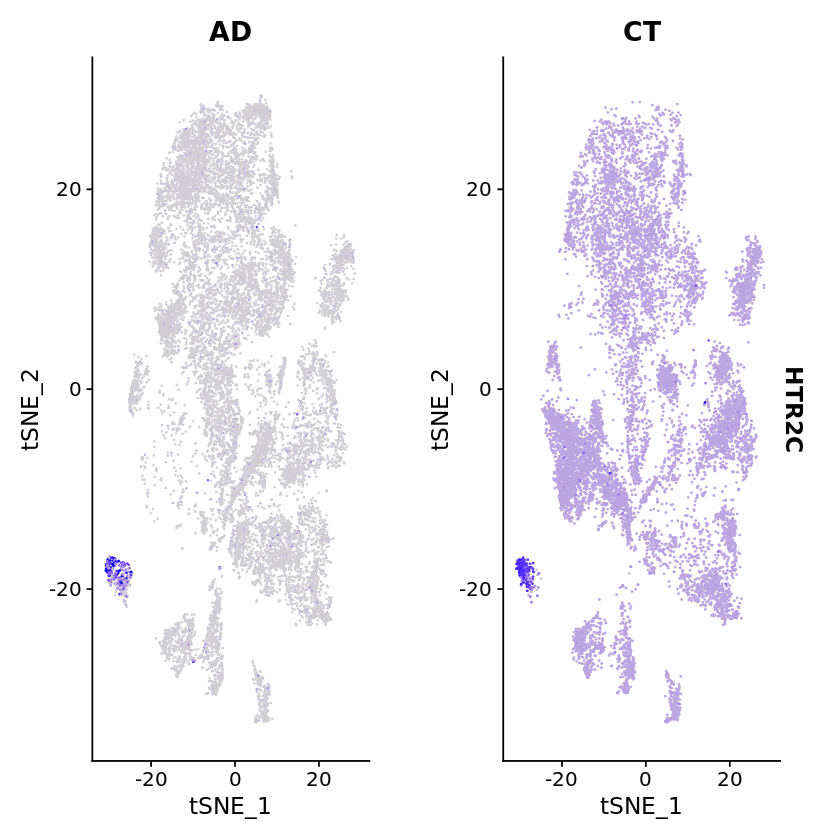

In [584]:
# Exc_ge_so = SetIdent(Exc_ge_so, value = Exc_ge_so$cond)
FeaturePlot(Exc_ge_so, features= 'HRNPCL1', reduction = 'tsne', split.by='ident')

In [596]:
# 'SNRPC' %in% rownames(Exc_ge_so)
which(startsWith(rownames(Exc_ge_so), 'HNRN'))

[1] 681

In [612]:
# ct_ge_so <- readRDS('../Dimitry_Velmeshev_ASD/rdata/Control_cell_types_GE_PFC.rds')
ct_ge_so_exc <- subset(ct_ge_so, subset= main_cellTypes =='Excitatory_Neurons')

In [609]:
AD_ge_so <- readRDS('../Kapmann/rdata/ge_celltypes_Sos/SFG_Exc_ge.rds')
AD_ge_so


An object of class Seurat 
33694 features across 15012 samples within 1 assay 
Active assay: originalexp (33694 features, 1000 variable features)
 5 dimensional reductions calculated: CCA, CCA.ALIGNED, TSNE, pca, umap

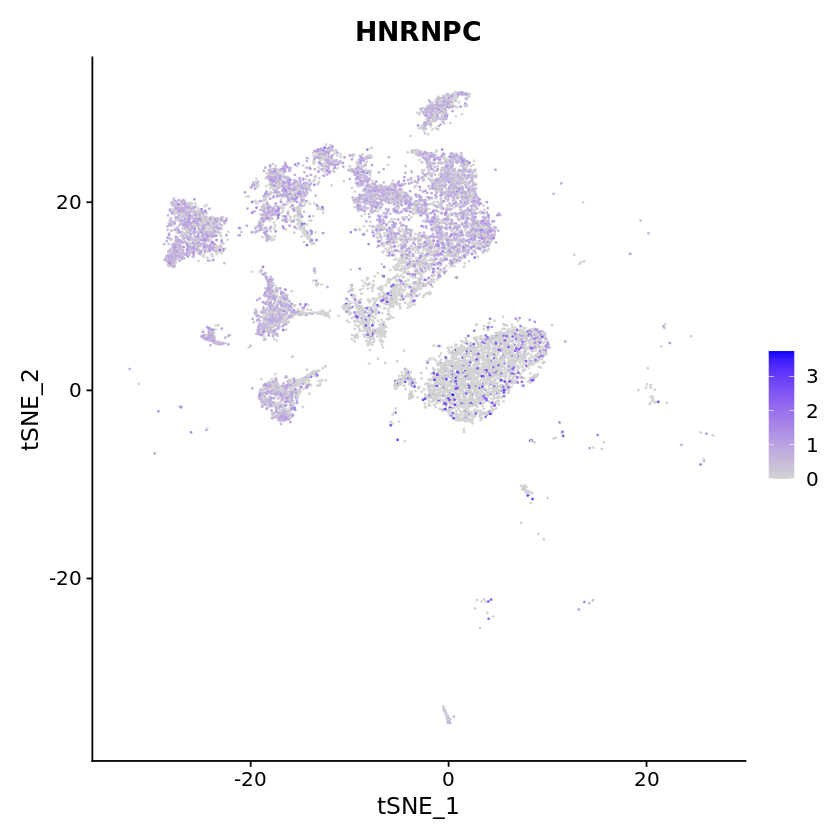

In [613]:
FeaturePlot(ct_ge_so_exc, features='HNRNPC', reduction = 'tsne')

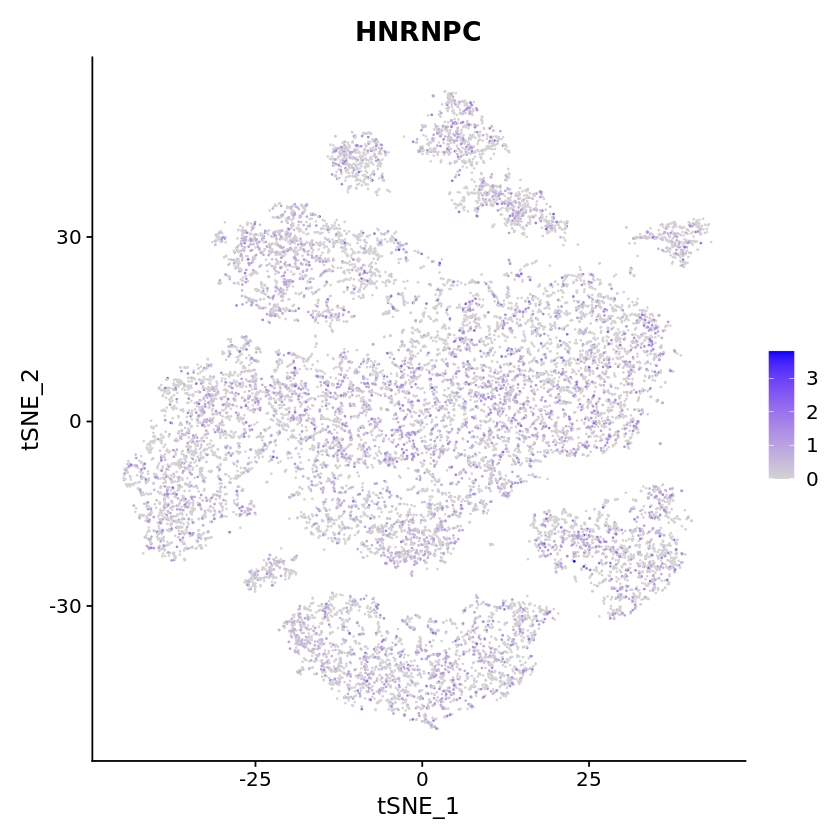

In [616]:
FeaturePlot(AD_ge_so, features='HNRNPC', reduction = 'TSNE')

In [706]:
# AD_ge_so <- RenameAssays(object = AD_ge_so, originalexp = 'RNA')
ct_ge_so_exc$cond <- 'CT'
AD_ge_so$cond <- 'AD'
ct_ge_so_exc$subclusterAssignment <- ct_ge_so_exc$cluster
so.list <- list(AD=AD_ge_so, CT=ct_ge_so_exc)
so.list <- lapply(X = so.list, FUN = SCTransform)
features <- SelectIntegrationFeatures(object.list = so.list, nfeatures = 33694)
print('feature selection is done')
so.list <- PrepSCTIntegration(object.list = so.list, anchor.features = features)
ge_so.anchors <- FindIntegrationAnchors(object.list = so.list, normalization.method = "SCT",
    anchor.features = features)
print('got the anchors')
Exc_ge_integrated <- IntegrateData(anchorset = ge_so.anchors, normalization.method = "SCT")
print('integration is done')
Exc_ge_integrated <- RunPCA(Exc_ge_integrated, verbose = FALSE)
Exc_ge_integrated <- RunUMAP(Exc_ge_integrated, reduction = "pca", dims = 1:20)
Exc_ge_integrated <- RunTSNE(Exc_ge_integrated, dims = 1:20, perplexity=200)

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 26898 by 15012

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 38 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 26898 genes



  |======================================================================| 100%


Computing corrected count matrix for 26898 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 4.229179 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 32026 by 12023

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"


  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 38 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 32026 genes



  |======================================================================| 100%


Computing corrected count matrix for 32026 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 4.191329 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



[1] "feature selection is done"


Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 22057 anchors

Filtering anchors

	Retained 14386 anchors



[1] "got the anchors"


Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



[1] "integration is done"


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
00:55:41 UMAP embedding parameters a = 0.9922 b = 1.112

00:55:41 Read 27035 rows and found 20 numeric columns

00:55:41 Using Annoy for neighbor search, n_neighbors = 30

00:55:41 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

00:55:44 Writing NN index file to temp file /tmp/Rtmp1EVg4y/filee48a61645e36

00:55:44 Searching Annoy index using 1 thread, search_k = 3000

00:55:53 Annoy recall = 100%

00:55:57 Commencing smooth kNN distance calibration using 1 thread

00:56:01 Initializing fr

In [723]:
top_tomtom_hits <- c('HNRNPC','HNRNPA1L2','YBX1','SRSF9','HNRNPA1','PTBP1','ZC3H10','U2AF2', 'HNRNPCL1','FUS')

In [726]:
ad_rbp_exp <- as.data.frame(AverageExpression(AD_ge_so, features =top_tomtom_hits ))
ct_rbp_exp <- as.data.frame(AverageExpression(ct_ge_so_exc, features = top_tomtom_hits))
log_fold_ch <- as.data.frame(log(as.numeric(ct_rbp_exp$all)/as.numeric(ad_rbp_exp$all), base = 2))
rownames(log_fold_ch) <-  rownames(ad_rbp_exp)
log_fold_ch

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.

The following grouping variables have 1 value and will be ignored: ident

All grouping variables have 1 value only. Computing across all cells.



log(as.numeric(ct_rbp_exp$all)/as.numeric(ad_rbp_exp$all), base = 2)
HNRNPC     0.6306428                                                          
HNRNPA1L2 -0.9638523                                                          
YBX1       0.5300099                                                          
SRSF9      0.5363671                                                          
HNRNPA1         -Inf                                                          
PTBP1     -1.0585804                                                          
ZC3H10    -0.8357075                                                          
U2AF2     -0.7632115                                                          
HNRNPCL1  -1.7326069                                                          
FUS        0.1937064

In [698]:
log_fold_ch

numeric(0)

In [690]:
HNRNPC, 0.437128246773808
HNRNPA1L2,-0.668091411337557
YBX1, 0.36737498802131
SRSF9, 0.371781195267957
HNRNPA1, log(0/0.5439138) > -Inf > log(0/0.5439138)
PTBP1,-0.733751813300665
ZC3H10, -0.579268741551341
U2AF2, -0.529017889426988
HRNPCL1,-1.20095118213765 > log(0.004504714/0.01497041)

[1] 0.4371282

In [691]:
# HNRNPC ct/AD
log(0.9997879/0.6457516)

[1] 0.4371282

In [680]:
# YBX1
log(0.2180279/0.1509952)

[1] 0.367375

In [676]:
#SRSF9
log(0.3537897/0.2439398)

[1] 0.3717812

In [656]:
# HNRNPA1L2
log(0.02243551/0.04376071)

[1] -0.6680914

In [658]:
# HNRNPA1  >>>> sig
log(0/0.5439138)

[1] -Inf

In [654]:
# ZC3H10
log(6.641162e-05/0.000118527)

[1] -0.5792687

In [647]:
# PTBP1
log(0.1362117/0.2837127)

[1] -0.7337518

In [644]:
# U2AF2
log(0.1787921/0.3034575)

[1] -0.5290179

In [725]:
# HRNPCL1
log(0.004504714/0.01497041, base = 2)

[1] -1.732606

In [714]:
FeaturePlot(Exc_ge_integrated, features= 'HRNPCL1', reduction = 'tsne', split.by='ident')

Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
"The following requested variables were not found: HRNPCL1"


ERROR: Error: None of the requested features were found: HRNPCL1 in slot data


In [713]:
DefaultAssay(Exc_ge_integrated) <- 'SCT'
DefaultAssay(Exc_ge_integrated)

[1] "SCT"

In [715]:
## ok we have trouble visualizing this, later you might want to spend some time on it! to visualize good examples

In [729]:
write.table(sig_upregulated_long_utrs, file='results/seq_level_res/AD_vs_CT_Excitatory_utr_shifts.tsv', quote=F)

# Chapter 10
## lets replicate this result for MicroGlia


In [2]:
AD_CT_all_peaks_so <- readRDS('rdata//AD_CT_all_peaks_so.rds')
## matadata for control cells
ct_all <- readRDS('../Dimitry_Velmeshev_ASD/rdata/Control_cell_types_GE_PFC.rds')
ct_meta_data <- data.frame(clusters=ct_all$cluster, 
                           main_celltype=paste0('CT_',ct_all$main_cellTypes))
ct_meta_data$cond <- 'CT'
ct_meta_data$cells <- rownames(ct_meta_data)

## metadata for AD
ad_all <- readRDS('../Kapmann/rdata/SFG_all_cells_ge_so_nosfg7.rds')
AD_meta_data <- data.frame(clusters=ad_all$clusterAssignment,
                           main_celltype=paste0('AD_',ad_all$clusterCellType))
AD_meta_data$cond <- 'AD'
AD_meta_data$cells <- rownames(AD_meta_data)
AD_CT_metadata <- rbind(ct_meta_data, AD_meta_data)

AD_CT_metadata$main_celltype <- plyr::mapvalues(x = AD_CT_metadata$main_celltype,
                                          from = c("AD_Astro", "AD_Endo","AD_Exc",
                                                  "AD_Inh","AD_Micro","AD_Oligo"),
                                          to = c("AD_Astrocytes", "AD_Endothelial",
                                                 "AD_Excitatory_Neurons",
                                                  "AD_Inhibitory_Neurons","AD_Microglia",
                                                 "AD_Oligodendrocytes"))
rownames(AD_CT_metadata) <- AD_CT_metadata$cells

AD_CT_metadata

clusters         main_celltype         cond
AAACCTGAGATGGCGT-1_4341_BA46 AST-PP           CT_Astrocytes         CT  
AAACCTGAGCTAACTC-1_4341_BA46 Oligodendrocytes CT_Oligodendrocytes   CT  
AAACCTGAGTGTTAGA-1_4341_BA46 L5/6             CT_Excitatory_Neurons CT  
AAACCTGCACCCATTC-1_4341_BA46 L2/3             CT_Excitatory_Neurons CT  
AAACCTGTCTCATTCA-1_4341_BA46 Microglia        CT_Microglia          CT  
AAACCTGTCTTAGCCC-1_4341_BA46 L5/6-CC          CT_Excitatory_Neurons CT  
AAACGGGAGAACAATC-1_4341_BA46 Neu-NRGN-I       CT_Excitatory_Neurons CT  
AAACGGGAGAGCAATT-1_4341_BA46 Oligodendrocytes CT_Oligodendrocytes   CT  
AAACGGGAGCGGCTTC-1_4341_BA46 OPC              CT_OPC                CT  
AAACGGGAGGACGAAA-1_4341_BA46 AST-PP           CT_Astrocytes         CT  
AAACGGGGTCGGCATC-1_4341_BA46 L2/3             CT_Excitatory_Neurons CT  
AAACGGGGTTCTGGTA-1_4341_BA46 Neu-mat          CT_Excitatory_Neurons CT  
AAACGGGTCCACGTTC-1_4341_BA46 Oligodendrocytes CT_Oligodendrocytes   CT  
AAAGATGAGCTACCGC-1_4341_BA46 OPC              CT_OPC                CT  
AAAGATGCAGATTGCT-1_4341_BA46 Oligodendrocytes CT_Oligodendrocytes   CT  
AAAGATGCAGCGTCCA-1_4341_BA46 L2/3             CT_Excitatory_Neurons CT  
AAAGATGGTACCGCTG-1_4341_BA46 L5/6-CC          CT_Excitatory_Neurons CT  
AAAGATGGTCACTGGC-1_4341_BA46 Oligodendrocytes CT_Oligodendrocytes   CT  
AAAGATGGTCCGAATT-1_4341_BA46 L2/3             CT_Excitatory_Neurons CT  
AAAGATGGTGCTCTTC-1_4341_BA46 Oligodendrocytes CT_Oligodendrocytes   CT  
AAAGATGGTGGTACAG-1_4341_BA46 L5/6-CC          CT_Excitatory_Neurons CT  
AAAGCAAAGAACAATC-1_4341_BA46 Oligodendrocytes CT_Oligodendrocytes   CT  
AAAGCAAAGGCGTACA-1_4341_BA46 OPC              CT_OPC                CT  
AAAGCAAAGGCTATCT-1_4341_BA46 Oligodendrocytes CT_Oligodendrocytes   CT  
AAAGCAACACAACGTT-1_4341_BA46 Oligodendrocytes CT_Oligodendrocytes   CT  
AAAGCAACAGCTGGCT-1_4341_BA46 Microglia        CT_Microglia          CT  
AAAGCAAGTAAGTGGC-1_4341_BA46 Oligodendrocytes CT_Oligodendrocytes   CT  
AAAGCAAGTGGTAACG-1_4341_BA46 IN-SST           CT_Inhibitory_Neurons CT  
AAAGCAAGTGGTGTAG-1_4341_BA46 OPC              CT_OPC                CT  
AAAGCAAGTTAGGGTG-1_4341_BA46 L5/6             CT_Excitatory_Neurons CT  
⋮                            ⋮                ⋮                     ⋮   
SFG10_TTTGCGCGTTAGATGA       SFG:Exc.1        AD_Excitatory_Neurons AD  
SFG10_TTTGCGCGTTCGGCAC       SFG:Exc.4        AD_Excitatory_Neurons AD  
SFG10_TTTGCGCTCATTCACT       SFG:Oligo.1      AD_Oligodendrocytes   AD  
SFG10_TTTGCGCTCCTTGGTC       SFG:Oligo.1      AD_Oligodendrocytes   AD  
SFG10_TTTGCGCTCGGTCCGA       SFG:Exc.4        AD_Excitatory_Neurons AD  
SFG10_TTTGCGCTCGTTGCCT       SFG:Oligo.1      AD_Oligodendrocytes   AD  
SFG10_TTTGGTTAGAGGACGG       SFG:Exc.1        AD_Excitatory_Neurons AD  
SFG10_TTTGGTTAGAGGGCTT       SFG:Inh.1        AD_Inhibitory_Neurons AD  
SFG10_TTTGGTTAGCGAGAAA       SFG:Endo         AD_Endothelial        AD  
SFG10_TTTGGTTAGCGGCTTC       SFG:Exc.5        AD_Excitatory_Neurons AD  
SFG10_TTTGGTTAGGCATGTG       SFG:OPC          AD_OPC                AD  
SFG10_TTTGGTTAGTCACGCC       SFG:Oligo.1      AD_Oligodendrocytes   AD  
SFG10_TTTGGTTCATCACAAC       SFG:OPC          AD_OPC                AD  
SFG10_TTTGGTTCATCACGTA       SFG:OPC          AD_OPC                AD  
SFG10_TTTGGTTGTTAGATGA       SFG:Micro        AD_Microglia          AD  
SFG10_TTTGGTTGTTCAGCGC       SFG:Micro        AD_Microglia          AD  
SFG10_TTTGGTTTCAACGAAA       SFG:Exc.1        AD_Excitatory_Neurons AD  
SFG10_TTTGGTTTCACCGGGT       SFG:Oligo.1      AD_Oligodendrocytes   AD  
SFG10_TTTGGTTTCTAGAGTC       SFG:Exc.4        AD_Excitatory_Neurons AD  
SFG10_TTTGGTTTCTGAGTGT       SFG:Inh.2        AD_Inhibitory_Neurons AD  
SFG10_TTTGTCAAGCCGATTT       SFG:Astro.2      AD_Astrocytes         AD  
SFG10_TTTGTCAAGCGCTCCA       SFG:Inh.2        AD_Inhibitory_Neurons AD  
SFG10_TTTGTCACACTTCTGC       SFG:Exc.5        AD_Excitatory_Neurons AD  
SFG10_TTTGTCAC

In [3]:
AD_CT_all_peaks_so_filtered <- subset(AD_CT_all_peaks_so, subset=cellnames %in% AD_CT_metadata$cells)
AD_CT_all_peaks_so_filtered <- AddMetaData(AD_CT_all_peaks_so_filtered, metadata = AD_CT_metadata)
AD_CT_all_peaks_so_filtered

An object of class Seurat 
354947 features across 90842 samples within 1 assay 
Active assay: RNA (354947 features, 0 variable features)

In [4]:
table(AD_CT_all_peaks_so_filtered$main_celltype)


        AD_Astrocytes        AD_Endothelial AD_Excitatory_Neurons 
                 7911                  1049                 18735 
AD_Inhibitory_Neurons          AD_Microglia   AD_Oligodendrocytes 
                 7603                  4033                 17968 
               AD_OPC         CT_Astrocytes        CT_Endothelial 
                 3396                  2942                   680 
CT_Excitatory_Neurons CT_Inhibitory_Neurons          CT_Microglia 
                12023                  4336                  1320 
  CT_Oligodendrocytes                CT_OPC 
                 5892                  2954 

In [5]:
AD_CT_all_peaks_so_filtered <- SetIdent(AD_CT_all_peaks_so_filtered, 
                                        value = AD_CT_all_peaks_so_filtered$main_celltype)

In [6]:
saveRDS(AD_CT_all_peaks_so_filtered, 'rdata/AD_CT_peaks_all_cells_SO_with_metadata.rds')

[1] "433 expressed peaks in feature types UTR3"
[1] "405 peaks after filtering out A-rich annotations"
[1] "91 genes detected with multiple peak sites expressed"
[1] "206 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."


-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

Warning message in vst(exp(alleffects), object):
"Dispersion function not parametric, applying log2(x+ 1) instead of vst...
"


[1] "Detecting shifts in 3'UTR length usage"


genomic_feature(s) population1_pct
CALM1:chr14:90407831-90408268:1       UTR3               0.10414084     
PTMA:chr2:231713071-231713541:1       UTR3               0.14108604     
SRGAP2C:chr1:121390449-121391259:1    UTR3               0.10711629     
PTMA:chr2:231708615-231712887:1       UTR3               0.07513018     
CALM1:chr14:90396952-90405002:1       UTR3               0.05653360     
CALM1:chr14:90400077-90404905:1       UTR3               0.04835110     
SPP1:chr4:87982478-87982997:1         UTR3               0.19439623     
SRGAP2C:chr1:121391323-121391647:1    UTR3               0.05256633     
RTN4:chr2:54972187-54972568:-1        UTR3               0.11108356     
HSP90AA1:chr14:102085231-102085966:-1 UTR3               0.03396975     
RTN4:chr2:54972503-54973001:-1        UTR3               0.04363997     
ATP5F1E:chr20:59030230-59030482:-1    UTR3               0.04512770     
                                      population2_pct pvalue       padj        
CALM1:chr14:90407831-90408268:1       0.10151515      3.405503e-11 7.015336e-09
PTMA:chr2:231713071-231713541:1       0.12727273      7.412936e-10 4.265500e-08
SRGAP2C:chr1:121390449-121391259:1    0.13409091      2.142864e-03 2.838224e-02
PTMA:chr2:231708615-231712887:1       0.12803030      9.088839e-10 4.265500e-08
CALM1:chr14:90396952-90405002:1       0.16060606      3.793742e-08 1.116444e-06
CALM1:chr14:90400077-90404905:1       0.12424242      2.236107e-03 2.838224e-02
SPP1:chr4:87982478-87982997:1         0.09545455      1.367230e-06 2.816495e-05
SRGAP2C:chr1:121391323-121391647:1    0.10303030      2.617780e-03 2.838224e-02
RTN4:chr2:54972187-54972568:-1        0.13106061      1.137628e-09 4.265500e-08
HSP90AA1:chr14:102085231-102085966:-1 0.10303030      2.629339e-10 2.708219e-08
RTN4:chr2:54972503-54973001:-1        0.11060606      1.242379e-09 4.265500e-08
ATP5F1E:chr20:59030230-59030482:-1    0.10984848      2.226113e-03 2.838224e-02
                                      Log2_fold_change SiteLocation NumSites
CALM1:chr14:90407831-90408268:1        1.1980324       5            5       
PTMA:chr2:231713071-231713541:1        0.4674298       2            2       
SRGAP2C:chr1:121390449-121391259:1     0.3469343       3            6       
PTMA:chr2:231708615-231712887:1       -0.6333548       1            2       
CALM1:chr14:90396952-90405002:1       -0.4880677       1            5       
CALM1:chr14:90400077-90404905:1       -0.2714679       2            5       
SPP1:chr4:87982478-87982997:1         -0.3679270       1            2       
SRGAP2C:chr1:121391323-121391647:1    -0.4426563       6            6       
RTN4:chr2:54972187-54972568:-1         0.4240133       2            2       
HSP90AA1:chr14:102085231-102085966:-1 -0.9909866       1            2       
RTN4:chr2:54972503-54973001:-1        -0.7763966       1            2       
ATP5F1E:chr20:59030230-59030482:-1    -0.3853408       1            2       
                                      FC_direction
CALM1:chr14:90407831-90408268:1       Up          
PTMA:chr2:231713071-231713541:1       Up          
SRGAP2C:chr1:121390449-121391259:1    Up          
PTMA:chr2:231708615-231712887:1       Down        
CALM1:chr14:90396952-90405002:1       Down        
CALM1:chr14:90400077-90404905:1       Down        
SPP1:chr4:87982478-87982997:1         Down        
SRGAP2C:chr1:121391323-121391647:1    Down        
RTN4:chr2:54972187-54972568:-1        Up          
HSP90AA1:chr14:102085231-102085966:-1 Down        
RTN4:chr2:54972503-54973001:-1        Down        
ATP5F1E:chr20:59030230-59030482:-1    Down

Warning message in wilcox.test.default(pos.upreg, pos.downreg):
"cannot compute exact p-value with ties"


[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 0.0161610180526158"


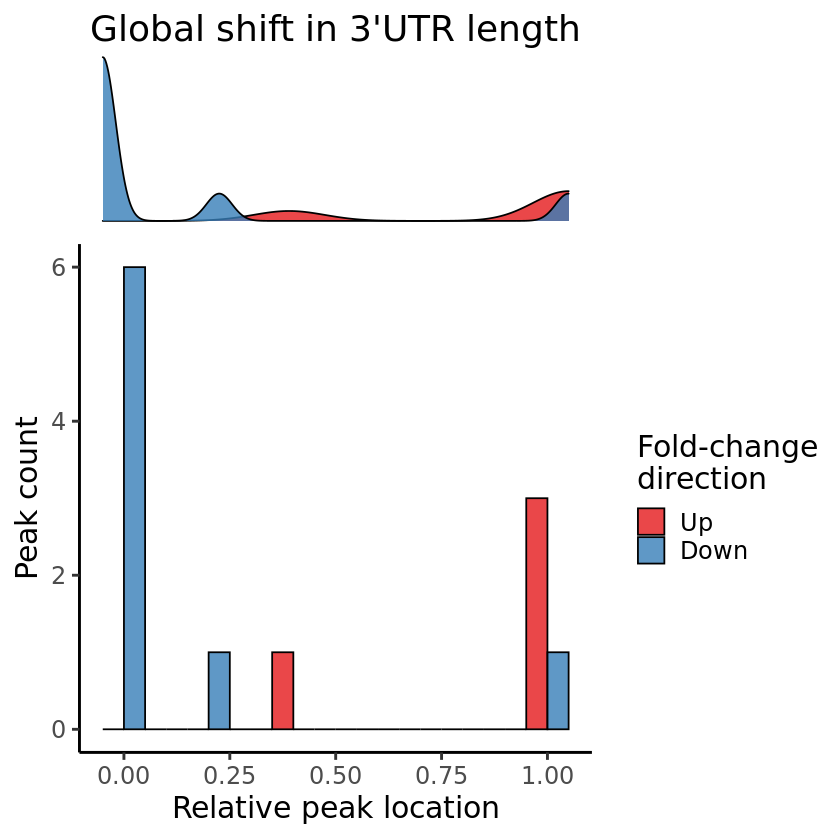

In [9]:
Mg_utr_shift_res <- DetectUTRLengthShift(peaks.object = AD_CT_all_peaks_so_filtered, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'AD_Microglia', 
                                      population.2 = 'CT_Microglia')
Mg_utr_shift_res
PlotUTRLengthShift(Mg_utr_shift_res)

[1] "5808 expressed peaks in feature types UTR3"
[1] "5406 peaks after filtering out A-rich annotations"
[1] "1220 genes detected with multiple peak sites expressed"
[1] "3428 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."


-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

Warning message in vst(exp(alleffects), object):
"Dispersion function not parametric, applying log2(x+ 1) instead of vst...
"


[1] "Detecting shifts in 3'UTR length usage"


genomic_feature(s) population1_pct
CALM1:chr14:90407831-90408268:1     UTR3               0.46915691     
CALM1:chr14:90407982-90408198:1     UTR3               0.42969880     
CALM1:chr14:90405127-90405679:1     UTR3               0.16651322     
BTBD8:chr1:92184291-92184725:1      UTR3               0.13100092     
BTBD8:chr1:92181557-92184239:1      UTR3               0.08167828     
ATP1B1:chr1:169132205-169132722:1   UTR3               0.68078390     
ATP1B1:chr1:169132156-169132324:1   UTR3               0.22819939     
ATP1B1:chr1:169131694-169132162:1   UTR3               0.09049060     
SYT1:chr12:79451569-79452008:1      UTR3               0.60331448     
SEPTIN7:chr7:35904888-35905371:1    UTR3               0.20662896     
SCOC:chr4:140382110-140382600:1     UTR3               0.16283046     
GABRA1:chr5:161899535-161899981:1   UTR3               0.28265158     
GABRA1:chr5:161898933-161899545:1   UTR3               0.09719847     
PRNP:chr20:4701170-4701590:1        UTR3               0.55609628     
TUBB3:chr16:89935919-89936087:1     UTR3               0.26226490     
TUBB3:chr16:89935880-89936110:1     UTR3               0.26910430     
PTMA:chr2:231713071-231713541:1     UTR3               0.30040773     
PTMA:chr2:231712884-231713196:1     UTR3               0.14362752     
PTMA:chr2:231712975-231713095:1     UTR3               0.07799553     
CALM3:chr19:46610417-46610782:1     UTR3               0.40299882     
SRSF5:chr14:69771517-69772005:1     UTR3               0.22964619     
SRSF5:chr14:69771090-69771846:1     UTR3               0.22819939     
SRSF5:chr14:69771273-69771681:1     UTR3               0.15467579     
STMN2:chr8:79665711-79666175:1      UTR3               0.18545311     
GRIA4:chr11:105912668-105913189:1   UTR3               0.11114034     
GRIA4:chr11:105912519-105913491:1   UTR3               0.11824280     
CAMTA1:chr1:7769275-7769706:1       UTR3               0.20005261     
NSG2:chr5:174108734-174109256:1     UTR3               0.29554123     
RTN3:chr11:63758216-63759538:1      UTR3               0.26016046     
RTN3:chr11:63758644-63759192:1      UTR3               0.11127187     
⋮                                   ⋮                  ⋮              
HSPH1:chr13:31140950-31148200:-1    UTR3               0.02406945     
SELENOF:chr1:86862805-86863176:-1   UTR3               0.03774826     
CYCS:chr7:25123211-25124526:-1      UTR3               0.03011969     
TRIM23:chr5:65590568-65591216:-1    UTR3               0.04721820     
SLC38A1:chr12:46188964-46198105:-1  UTR3               0.04353545     
CEP290:chr12:88136458-88142088:-1   UTR3               0.06576351     
POLR2J3:chr7:102566019-102566315:-1 UTR3               0.03314481     
POLR2J3:chr7:102566046-102566236:-1 UTR3               0.03182954     
CELF1:chr11:47466489-47467038:-1    UTR3               0.06865711     
GOLGA8B:chr15:34525628-34526091:-1  UTR3               0.03077732     
YWHAQ:chr2:9584231-9584915:-1       UTR3               0.05734578     
USP33:chr1:77711732-77715882:-1     UTR3               0.06208076     
USP33:chr1:77713124-77715836:-1     UTR3               0.05510983     
USP33:chr1:77713134-77714860:-1     UTR3               0.04563988     
GOLGA8A:chr15:34379353-34379923:-1  UTR3               0.02933053     
SCRG1:chr4:173388090-173391391:-1   UTR3               0.02328028     
SCRG1:chr4:173388143-173392776:-1   UTR3               0.02354334     
CADM1:chr11:115173915-115174868:-1  UTR3               0.06102854     
MTCH2:chr11:47618110-47623086:-1    UTR3               0.04695515     
PCMTD1:chr8:51819860-51833974:-1    UTR3               0.03787978     
RUFY2:chr10:68377114-68377636:-1    UTR3               0.04629751     
RSRC2:chr12:122515183-122522239:-1  UTR3               0.04274628     
RSRC2:chr12:122518977-122521387:-1  UTR3               0.02683151     
RSRC2:chr12:122518854-122522339:-1  UTR3               0.03682757     
GFOD1:chr6:13358069-13358645:-1     UTR3               0.050

[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 5.47701282412298e-59"


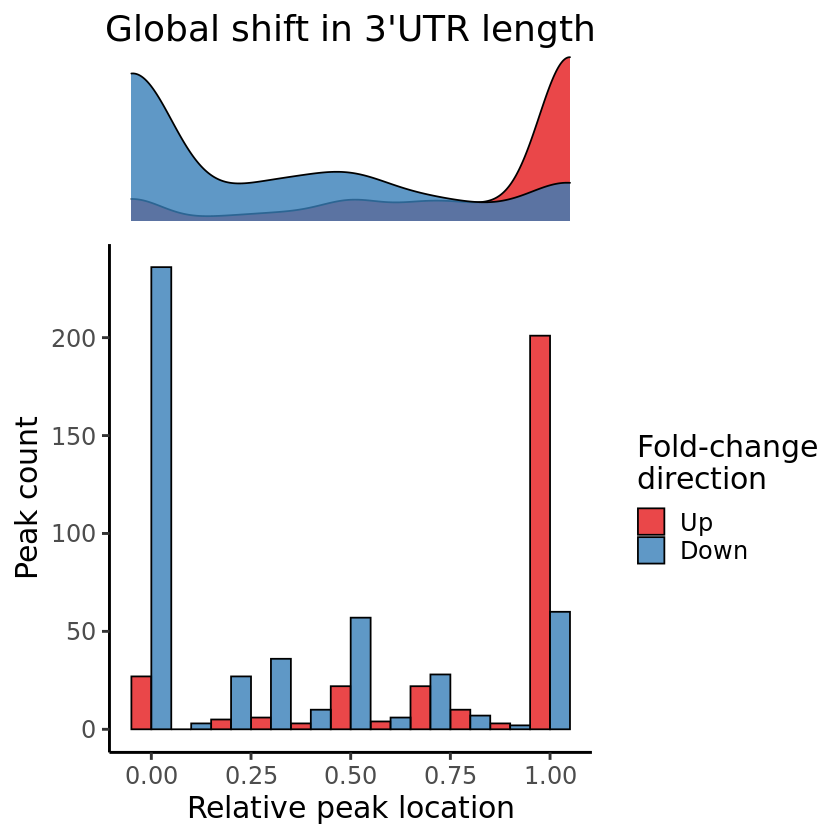

In [10]:
Inh_utr_shift_res <- DetectUTRLengthShift(peaks.object = AD_CT_all_peaks_so_filtered, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'AD_Inhibitory_Neurons', 
                                      population.2 = 'CT_Inhibitory_Neurons')
Inh_utr_shift_res
PlotUTRLengthShift(Inh_utr_shift_res)

[1] "1839 expressed peaks in feature types UTR3"
[1] "1767 peaks after filtering out A-rich annotations"
[1] "418 genes detected with multiple peak sites expressed"
[1] "1015 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."
[1] "Detecting shifts in 3'UTR length usage"


genomic_feature(s) population1_pct
SLC9A3R2:chr16:2038008-2038511:1      UTR3               0.16491897     
CALM1:chr14:90407831-90408268:1       UTR3               0.19351764     
CALM1:chr14:90407982-90408198:1       UTR3               0.17159199     
CALM1:chr14:90405127-90405679:1       UTR3               0.11725453     
MT2A:chr16:56608584-56609497:1        UTR3               0.46234509     
PTMA:chr2:231712884-231713196:1       UTR3               0.23736892     
PTMA:chr2:231713071-231713541:1       UTR3               0.35938990     
YWHAH:chr22:31957136-31957603:1       UTR3               0.17540515     
GTF2I:chr7:74760251-74760692:1        UTR3               0.11153480     
STMN2:chr8:79665711-79666175:1        UTR3               0.04671115     
LUC7L3:chr17:50741190-50745890:1      UTR3               0.14680648     
CALM3:chr19:46610417-46610782:1       UTR3               0.13727359     
CIRBP:chr19:1274151-1274880:1         UTR3               0.12202097     
RPL13A:chr19:49491878-49492308:1      UTR3               0.14299333     
EPAS1:chr2:46386247-46386697:1        UTR3               0.20209724     
CALD1:chr7:134933228-134934203:1      UTR3               0.10676835     
SYT1:chr12:79451569-79452008:1        UTR3               0.14775977     
CRIM1:chr2:36550568-36551135:1        UTR3               0.08579600     
NET1:chr10:5457980-5458529:1          UTR3               0.04957102     
TERF2IP:chr16:75656969-75657527:1     UTR3               0.08674929     
YBX1:chr1:42700969-42702428:1         UTR3               0.11630124     
YBX1:chr1:42701910-42702438:1         UTR3               0.10962822     
WSB1:chr17:27312739-27313950:1        UTR3               0.14871306     
EIF1:chr17:41691218-41691749:1        UTR3               0.22783603     
PTMA:chr2:231708615-231712887:1       UTR3               0.26882745     
SLC9A3R2:chr16:2038581-2039026:1      UTR3               0.02192564     
EPAS1:chr2:46384701-46385289:1        UTR3               0.01334604     
CALM1:chr14:90396952-90405002:1       UTR3               0.10867493     
CALM1:chr14:90400077-90404905:1       UTR3               0.09532888     
CALM1:chr14:90401271-90404878:1       UTR3               0.09246902     
⋮                                     ⋮                  ⋮              
CALM2:chr2:47170718-47170784:-1       UTR3               0.004766444    
TMEM123:chr11:102398269-102398737:-1  UTR3               0.024785510    
HNRNPA2B1:chr7:26192061-26192823:-1   UTR3               0.021925643    
HSP90AA1:chr14:102082820-102084016:-1 UTR3               0.055290753    
HSP90AA1:chr14:102083051-102083901:-1 UTR3               0.052430887    
HSP90AA1:chr14:102083092-102083506:-1 UTR3               0.049571020    
HSP90AA1:chr14:102082646-102083156:-1 UTR3               0.023832221    
JUN:chr1:58781969-58782569:-1         UTR3               0.008579600    
RTN4:chr2:54972767-54973253:-1        UTR3               0.039084843    
RTN4:chr2:54972503-54973001:-1        UTR3               0.055290753    
FLT1:chr13:28387692-28388148:-1       UTR3               0.033365110    
HMGB1:chr13:30461270-30465897:-1      UTR3               0.085795996    
HMGB1:chr13:30461251-30617388:-1      UTR3               0.119161106    
ADGRF5:chr6:46853491-46854013:-1      UTR3               0.021925643    
RPL22:chr1:6186483-6199739:-1         UTR3               0.155386082    
ITM2A:chrX:79360939-79361549:-1       UTR3               0.023832221    
H3F3B:chr17:75777856-75778874:-1      UTR3               0.203050524    
PTN:chr7:137227711-137343774:-1       UTR3               0.102001907    
ATP5F1E:chr20:59030230-59030482:-1    UTR3               0.143946616    
SPOCK2:chr10:72062324-72062860:-1     UTR3               0.041944709    
APP:chr21:25880975-25881166:-1        UTR3               0.041944709    
LHFPL6:chr13:39343730-39378590:-1     UTR3               0.042897998    
IDS:chrX:149479234-149479942:-1       UTR3               0.071496663    
ATRX:chrX:77683094-7768

[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 1.74611653323664e-10"


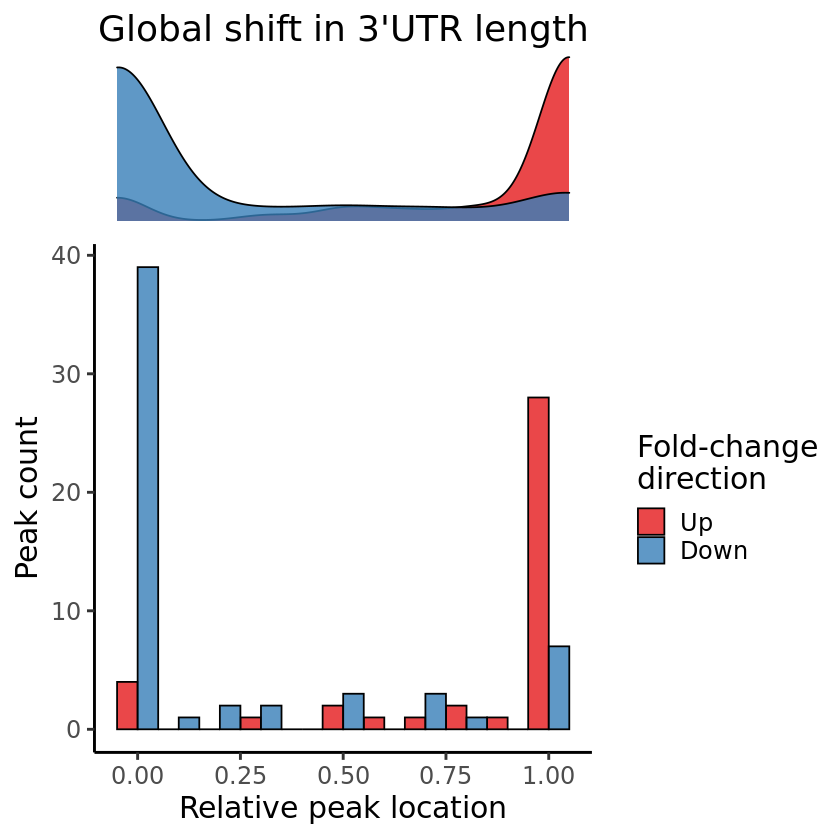

In [11]:
End_utr_shift_res <- DetectUTRLengthShift(peaks.object = AD_CT_all_peaks_so_filtered, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'AD_Endothelial', 
                                      population.2 = 'CT_Endothelial')
End_utr_shift_res
PlotUTRLengthShift(End_utr_shift_res)

[1] "1144 expressed peaks in feature types UTR3"
[1] "1069 peaks after filtering out A-rich annotations"
[1] "237 genes detected with multiple peak sites expressed"
[1] "576 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."


-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

Warning message in vst(exp(alleffects), object):
"Dispersion function not parametric, applying log2(x+ 1) instead of vst...
"


[1] "Detecting shifts in 3'UTR length usage"


genomic_feature(s) population1_pct
CALM1:chr14:90407831-90408268:1       UTR3               0.15724940     
CALM1:chr14:90407982-90408198:1       UTR3               0.13285299     
HILPDA:chr7:128458008-128458418:1     UTR3               0.06257110     
PTMA:chr2:231713071-231713541:1       UTR3               0.14966502     
SCG3:chr15:51720564-51721026:1        UTR3               0.06295032     
NTM:chr11:132336334-132336822:1       UTR3               0.12375174     
MT2A:chr16:56609084-56609261:1        UTR3               0.22045253     
GPR37L1:chr1:202129067-202129567:1    UTR3               0.20225003     
SRSF5:chr14:69771517-69772005:1       UTR3               0.16900518     
EIF1:chr17:41691218-41691749:1        UTR3               0.12375174     
UCHL1:chr4:41268183-41268435:1        UTR3               0.10833017     
HILPDA:chr7:128457443-128457959:1     UTR3               0.05802048     
PTMA:chr2:231708615-231712887:1       UTR3               0.06598407     
SCG3:chr15:51713274-51719774:1        UTR3               0.01643282     
CIRBP:chr19:1272703-1273225:1         UTR3               0.07369486     
CALM1:chr14:90396952-90405002:1       UTR3               0.09720642     
CALM1:chr14:90400077-90404905:1       UTR3               0.08431298     
CALM1:chr14:90401271-90404878:1       UTR3               0.07546454     
CALM1:chr14:90403753-90404832:1       UTR3               0.05663001     
GPR37L1:chr1:202130927-202131515:1    UTR3               0.08759954     
NTRK2:chr9:84810874-84811337:1        UTR3               0.13613955     
CPE:chr4:165495500-165497839:1        UTR3               0.05802048     
EIF1:chr17:41689809-41691049:1        UTR3               0.07331564     
NTM:chr11:132335056-132336037:1       UTR3               0.06990267     
SRSF5:chr14:69768192-69771177:1       UTR3               0.12931361     
SRSF5:chr14:69770217-69770565:1       UTR3               0.09682720     
SRSF5:chr14:69770176-69770465:1       UTR3               0.09316142     
SRSF5:chr14:69770207-69771073:1       UTR3               0.10238908     
MACF1:chr1:39485511-39485877:1        UTR3               0.07748704     
SLC1A2:chr11:35251205-35251526:-1     UTR3               0.56364556     
⋮                                     ⋮                  ⋮              
DST:chr6:56457987-56459017:-1         UTR3               0.19226394     
DST:chr6:56458083-56460615:-1         UTR3               0.18025534     
ARGLU1:chr13:106543252-106543730:-1   UTR3               0.12956643     
NRCAM:chr7:108147623-108148271:-1     UTR3               0.07837189     
CADM1:chr11:115173595-115174117:-1    UTR3               0.16622424     
SORBS1:chr10:95311771-95312146:-1     UTR3               0.13803565     
PTN:chr7:137227341-137227694:-1       UTR3               0.11730502     
SLC1A2:chr11:35256494-35257148:-1     UTR3               0.05498673     
SLC1A2:chr11:35259819-35260470:-1     UTR3               0.02970547     
SLC1A2:chr11:35251572-35251944:-1     UTR3               0.02945266     
SLC1A2:chr11:35259548-35259998:-1     UTR3               0.01428391     
GLUL:chr1:182383160-182383682:-1      UTR3               0.07230439     
RTN4:chr2:54972767-54973253:-1        UTR3               0.04095563     
RTN4:chr2:54972503-54973001:-1        UTR3               0.06080142     
HSP90AA1:chr14:102085231-102085966:-1 UTR3               0.06054860     
ARGLU1:chr13:106543881-106559583:-1   UTR3               0.05688282     
NRCAM:chr7:108147928-108150178:-1     UTR3               0.03981797     
HMGB1:chr13:30461270-30465897:-1      UTR3               0.10466439     
HNRNPA2B1:chr7:26191617-26192542:-1   UTR3               0.05144735     
SERPINE2:chr2:223975560-223975842:-1  UTR3               0.05144735     
PSAP:chr10:71816657-71816941:-1       UTR3               0.06105423     
AQP4:chr18:26855998-26856484:-1       UTR3               0.06863860     
PTN:chr7:137227616-137253870:-1       UTR3               0.07508532     
PLPP3:chr1:56496404-565

Warning message in wilcox.test.default(pos.upreg, pos.downreg):
"cannot compute exact p-value with ties"


[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 1.72860161947296e-08"


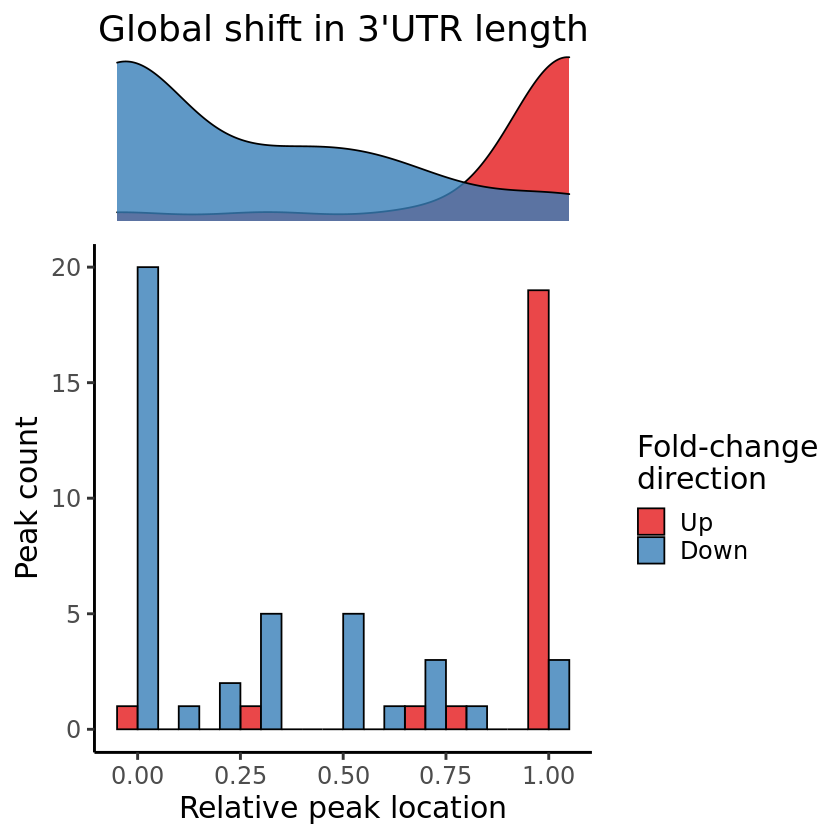

In [12]:
Ast_utr_shift_res <- DetectUTRLengthShift(peaks.object = AD_CT_all_peaks_so_filtered, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'AD_Astrocytes', 
                                      population.2 = 'CT_Astrocytes')
Ast_utr_shift_res
PlotUTRLengthShift(Ast_utr_shift_res)

[1] "1120 expressed peaks in feature types UTR3"
[1] "1047 peaks after filtering out A-rich annotations"
[1] "227 genes detected with multiple peak sites expressed"
[1] "544 individual peak sites to test"


converting counts to integer mode

Warning message in DESeqDataSet(rse, design, ignoreRank = TRUE):
"some variables in design formula are characters, converting to factors"


[1] "Running DEXSeq test..."


-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

Warning message in vst(exp(alleffects), object):
"Dispersion function not parametric, applying log2(x+ 1) instead of vst...
"


[1] "Detecting shifts in 3'UTR length usage"


genomic_feature(s) population1_pct
EPN2:chr17:19336227-19336715:1        UTR3               0.22438163     
CALM1:chr14:90407831-90408268:1       UTR3               0.13780919     
CALM1:chr14:90407982-90408198:1       UTR3               0.11778563     
SRSF5:chr14:69771517-69772005:1       UTR3               0.11307420     
SRSF5:chr14:69771090-69771846:1       UTR3               0.11719670     
PTMA:chr2:231713071-231713541:1       UTR3               0.16696113     
CIRBP:chr19:1274151-1274880:1         UTR3               0.23380448     
LUC7L3:chr17:50741190-50745890:1      UTR3               0.28975265     
GPR37L1:chr1:202129067-202129567:1    UTR3               0.15901060     
NTM:chr11:132336334-132336822:1       UTR3               0.10188457     
EIF1:chr17:41691218-41691749:1        UTR3               0.10482921     
VCAN:chr5:83581868-83582303:1         UTR3               0.21466431     
GTF2I:chr7:74760251-74760692:1        UTR3               0.14693757     
ABHD2:chr15:89201944-89202355:1       UTR3               0.17343934     
GRIA2:chr4:157365592-157366075:1      UTR3               0.10806832     
ALCAM:chr3:105576229-105576900:1      UTR3               0.05683157     
CIRBP:chr19:1272703-1273225:1         UTR3               0.06065960     
EPN2:chr17:19334405-19335795:1        UTR3               0.06654888     
PTMA:chr2:231708615-231712887:1       UTR3               0.07479388     
GPR37L1:chr1:202133138-202133592:1    UTR3               0.05624264     
CALM1:chr14:90396952-90405002:1       UTR3               0.09010601     
CALM1:chr14:90400077-90404905:1       UTR3               0.08038869     
CALM1:chr14:90401271-90404878:1       UTR3               0.07243816     
SNAP25:chr20:10306246-10307032:1      UTR3               0.05005889     
EIF1:chr17:41689809-41691049:1        UTR3               0.05506478     
GTF2I:chr7:74759525-74760023:1        UTR3               0.08303887     
MARCKS:chr6:113860721-113861238:1     UTR3               0.06095406     
ABHD2:chr15:89200263-89200792:1       UTR3               0.05005889     
NTM:chr11:132335056-132336037:1       UTR3               0.05918728     
SRSF5:chr14:69770176-69770465:1       UTR3               0.07449941     
⋮                                     ⋮                  ⋮              
SDC3:chr1:30869488-30869590:-1        UTR3               0.23144876     
HMGB1:chr13:30460864-30461420:-1      UTR3               0.14399293     
ARGLU1:chr13:106543252-106543730:-1   UTR3               0.07479388     
H3F3B:chr17:75777391-75777889:-1      UTR3               0.09305065     
MAPK10:chr4:86064048-86098816:-1      UTR3               0.09393404     
MAPK10:chr4:86031255-86098684:-1      UTR3               0.12985866     
CCDC88A:chr2:55333893-55335111:-1     UTR3               0.12868080     
CCDC88A:chr2:55332635-55335098:-1     UTR3               0.12779741     
CCDC88A:chr2:55334711-55339938:-1     UTR3               0.10453475     
FGF12:chr3:192143587-192170686:-1     UTR3               0.05771496     
CCDC88A:chr2:55343651-55362342:-1     UTR3               0.05123675     
RTN4:chr2:54972767-54973253:-1        UTR3               0.02738516     
RTN4:chr2:54972503-54973001:-1        UTR3               0.04240283     
NRCAM:chr7:108148743-108149617:-1     UTR3               0.02856302     
NRCAM:chr7:108147928-108150178:-1     UTR3               0.07714959     
HMGB1:chr13:30461270-30465897:-1      UTR3               0.07567727     
PSAP:chr10:71816657-71816941:-1       UTR3               0.06242638     
MMP16:chr8:88038465-88039503:-1       UTR3               0.04799764     
MMP16:chr8:88038875-88039349:-1       UTR3               0.03710247     
ANKRD36C:chr2:95888840-95925363:-1    UTR3               0.10306243     
ANKRD36C:chr2:95891697-95905795:-1    UTR3               0.05889282     
SERPINE2:chr2:223975560-223975842:-1  UTR3               0.04063604     
ARGLU1:chr13:106543881-106559583:-1   UTR3               0.05653710     
HNRNPA2B1:chr7:26191617

Warning message in wilcox.test.default(pos.upreg, pos.downreg):
"cannot compute exact p-value with ties"


[1] "Wilcoxon Rank-sum test comparing relative peak locations for up- vs down-regulated peaks:"
[1] "P-value = 7.17612335934495e-06"


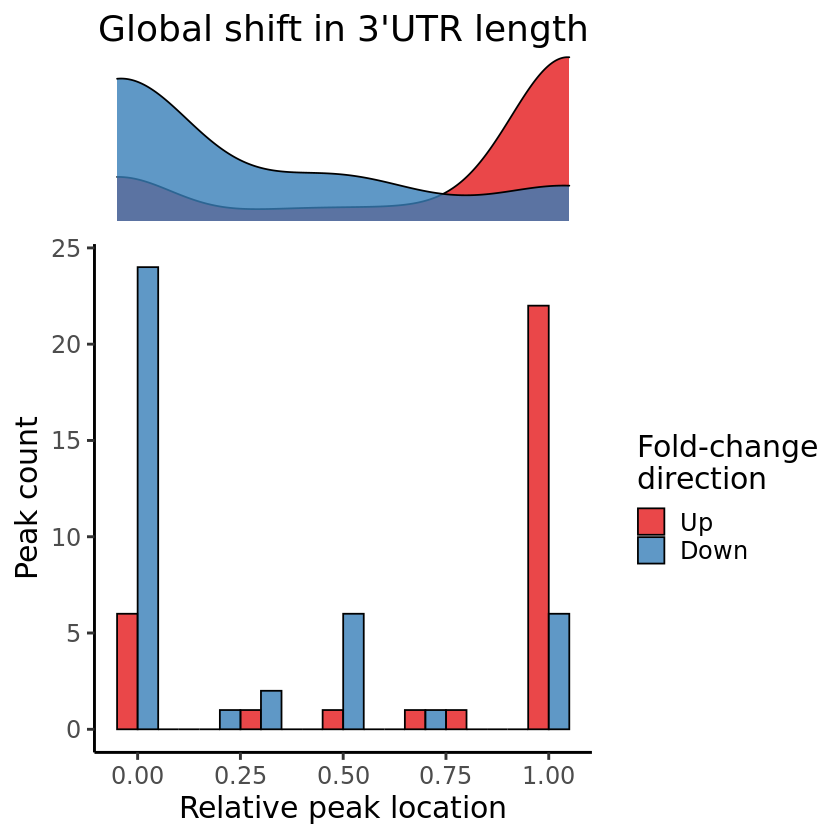

In [13]:
OPC_utr_shift_res <- DetectUTRLengthShift(peaks.object = AD_CT_all_peaks_so_filtered, 
                                      gtf_gr = gtf_gr,
                                      gtf_TxDb = gtf_TxDb,
                                      population.1 = 'AD_OPC', 
                                      population.2 = 'CT_OPC')
OPC_utr_shift_res
PlotUTRLengthShift(OPC_utr_shift_res)

In [145]:
results <- list(c('AD_Astrocytes','Ast_utr_shift_res'),
                c('AD_OPC','OPC_utr_shift_res'),
                c('AD_Endothelial','End_utr_shift_res'),
                c('AD_Inhibitory_Neurons','Inh_utr_shift_res'),
                c('AD_Microglia','Mg_utr_shift_res'))
for (case in results){
    name <- case[[1]]
    df <- case[[2]]
}

## Cool now lets get the seqs and do motif analysis for all of them. 


In [146]:
## the block to run on the out put of DetectUTRshift dataframe

### 1-  read in the overall peaks annotation file for the study
peak.annotations <- read.table("sierra_AD_CT_mix/AD_CT_peaks_annotated.txt", 
                               header = TRUE,
                               sep = "\t",
                               row.names = 1,
                               stringsAsFactors = FALSE)
### 2-  get the reference UTR regions for all the genes
utr3.ref <- GenomicFeatures::threeUTRsByTranscript(gtf_TxDb)
utr3.ref <- unlist(utr3.ref)
for (case in results){
    tryCatch(
        {
        name <- case[[1]]
        df <- get(case[[2]])
        print(paste('processing the ', name, 'results'))

        ### 3- source in the usefull function that desiend for this analysis
        source('/home/aiden/codes/APA_stuff/post_qual/APA/usefull_functions.R')


        ### 4- get all the expressed peaks in the cell population you are studying
        all.peaks.expressed <- as.data.frame(GetExpressedPeaks(AD_CT_all_peaks_so_filtered,
                                                               population.1 = name))
        colnames(all.peaks.expressed) <- 'peaks'

        ### 5- get the significantly lengthened and expressed UTRs with the designed function
        ###    this will add more info to the input data frame
        res <- get_sig_longer_UTRs(df)
        tmp_genes_to_operate <- res[['genes']]
        tmp_lenghtened_UTRs <- res[['df']]

        ### 6- get the utr region using the distal and proximal peaks locations.
        ###    there are a lot going on in this step to identify the right expressed
        ###    most proximal peak location and then retruning proximal and distal peak locations for genes
        tmp_lengthened_genes_UTR_reg <- invisible(lapply(X = tmp_genes_to_operate$gene_id,FUN = get_utr,
                                                         lengthened_utrs_df=tmp_lenghtened_UTRs,
                                                         all_expressed_peaks_df=all.peaks.expressed,
                                                         utr3.ref=utr3.ref))
        tmp_lengthened_genes_UTR_reg <- t(as.data.frame(tmp_lengthened_genes_UTR_reg, col.names=F))
        colnames(tmp_lengthened_genes_UTR_reg) <- c('distal_peak', 'proximal_peak')
        tmp_Genes_dis_prox_df <- data.frame(tmp_genes_to_operate, tmp_lengthened_genes_UTR_reg)
        tmp_Genes_dis_prox_df = tmp_Genes_dis_prox_df[!grepl("Not-found", tmp_Genes_dis_prox_df$proximal_peak),]


        ### 7- get the bed file for the UTR region between most proximal and distal peaks and save the file
        tmp_lengthened_UTR_region_bed <- get_utr_bed_file(tmp_Genes_dis_prox_df)
        outname <- paste0('results/',name,'_upregulated_longer_utr_region.bed')
        write.table(tmp_lengthened_UTR_region_bed['bed_out'], file=outname,
                   row.names=F, col.names=F, quote=F)
            },
        error=function(cond) {
            message(paste("couldnt get any UTR seqs for the population:", name))
            message("Here's the original error message:")
            message(cond)
            # Choose a return value in case of error
            return(NA)
        })
}

[1] "processing the  AD_Astrocytes results"


The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1



[1] "processing the  AD_OPC results"


The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1



[1] "processing the  AD_Endothelial results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not pr

[1] "processing the  AD_Inhibitory_Neurons results"


The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: -1

The following `from` values were not present in `x`: 1

The following `from` values were not p

[1] "processing the  AD_Microglia results"


The following `from` values were not present in `x`: -1



In [131]:
for f in *.bed;
do;
out=${f./}
bedtools getfasta -fi ~/data/refgenome/refdata-gex-GRCh38-2020-A/fasta/genome.fa -bed $f -name

Row.names                         genomic_feature(s) population1_pct
1  ATRX:chrX:77681793-77682981:-1    UTR3               0.09056244     
2  CALD1:chr7:134933228-134934203:1  UTR3               0.10676835     
3  CALM1:chr14:90405127-90405679:1   UTR3               0.11725453     
4  CALM1:chr14:90407831-90408268:1   UTR3               0.19351764     
5  CALM1:chr14:90407982-90408198:1   UTR3               0.17159199     
6  CIRBP:chr19:1274151-1274880:1     UTR3               0.12202097     
7  CRIM1:chr2:36550568-36551135:1    UTR3               0.08579600     
8  GPCPD1:chr20:5544399-5544811:-1   UTR3               0.02097235     
9  GTF2I:chr7:74760251-74760692:1    UTR3               0.11153480     
10 HMGB1:chr13:30460864-30461420:-1  UTR3               0.15061964     
11 JUN:chr1:58781212-58781950:-1     UTR3               0.06577693     
12 LUC7L3:chr17:50741190-50745890:1  UTR3               0.14680648     
13 NET1:chr10:5457980-5458529:1      UTR3               0.04957102     
14 PTN:chr7:137227341-137227694:-1   UTR3               0.09532888     
15 RGS5:chr1:163142239-163142743:-1  UTR3               0.10104862     
16 RGS5:chr1:163145866-163146240:-1  UTR3               0.07626311     
17 RPL13A:chr19:49491878-49492308:1  UTR3               0.14299333     
18 RPL22:chr1:6186066-6186657:-1     UTR3               0.10962822     
19 RTN4:chr2:54972187-54972568:-1    UTR3               0.16205910     
20 SKP1:chr5:134156759-134157479:-1  UTR3               0.09914204     
21 STMN2:chr8:79665711-79666175:1    UTR3               0.04671115     
22 SYT1:chr12:79451569-79452008:1    UTR3               0.14775977     
23 TERF2IP:chr16:75656969-75657527:1 UTR3               0.08674929     
24 YBX1:chr1:42700969-42702428:1     UTR3               0.11630124     
25 YBX1:chr1:42701910-42702438:1     UTR3               0.10962822     
   population2_pct pvalue       padj         Log2_fold_change SiteLocation
1  0.10147059      6.145887e-04 6.365383e-03 0.7205963         3          
2  0.16176471      9.543575e-05 1.258017e-03 0.6329565         4          
3  0.21176471      2.817562e-05 5.017238e-04 0.8202132         8          
4  0.32058824      4.107227e-17 3.789850e-15 1.0313560         9          
5  0.29558824      1.115315e-13 7.075281e-12 0.9840889        10          
6  0.16911765      3.457318e-05 5.911133e-04 0.6280334         4          
7  0.11176471      1.226475e-04 1.560835e-03 0.5167587         2          
8  0.21617647      1.795167e-03 1.598329e-02 1.0429789         3          
9  0.19705882      1.595359e-08 4.261288e-07 0.6445511         2          
10 0.21323529      7.057102e-13 3.769978e-11 1.1583457         3          
11 0.18970588      1.391073e-09 4.278603e-08 0.6237029         2          
12 0.11764706      7.746104e-06 1.455981e-04 0.7165067         2          
13 0.14117647      2.906869e-04 3.352809e-03 0.7023255         4          
14 0.24264706      2.742530e-08 6.789435e-07 0.7650357         3          
15 0.24411765      9.818402e-28 1.768867e-25 1.2436806         7          
16 0.17500000      7.906745e-04 8.025347e-03 0.5845842         4          
17 0.15294118      7.062962e-05 9.956814e-04 0.6061669         2          
18 0.10735294      3.888836e-05 6.366401e-04 0.6812118         2          
19 0.26176471      3.225646e-15 2.518485e-13 0.9281666         3          
20 0.15882353      5.334887e-03 4.197605e-02 0.5090889         5          
21 0.14852941      2.116794e-07 4.883058e-06 1.0179749         3          
22 0.25588235      1.230215e-04 1.560835e-03 0.6598101         2          
23 0.10588235      9.056795e-04 9.101630e-03 0.5021827         2          
24 0.06470588      1.021659e-03 9.782869e-03 0.7206853         4          
25 0.05882353      1.958255e-03 1.684431e-02 0.7168610         5          
   NumSites FC_direction seqnames gene_id width start     end      
1   5       Up           chrX     ATRX    1189   77681793  77682981
2   4       Up           chr7     CALD1    97

In [132]:
tmp_genes_to_operate

gene_id
1  ATRX   
2  CALD1  
3  CALM1  
6  CIRBP  
7  CRIM1  
8  GPCPD1 
9  GTF2I  
10 HMGB1  
11 JUN    
12 LUC7L3 
13 NET1   
14 PTN    
15 RGS5   
17 RPL13A 
18 RPL22  
19 RTN4   
20 SKP1   
21 STMN2  
22 SYT1   
23 TERF2IP
24 YBX1